In [2]:
import os
import keras
import json
import glob
import sys
import pandas as pd
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse
#from keras_applications.resnext import ResNeXt50
from keras.utils.data_utils import get_file
#import face_recognition
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


import fnmatch
import re
import copy
import matplotlib.pyplot as plt
import scipy
import scipy.signal
# ! pip install mpu
import mpu
from script_onelist_colab import norm_int,repair,csv_exp,sel_exp,maxima,import_raw,read_processed,read_processed_sel,correct,onelist,interpolate_mat,interpolation_spectra

def touch(fname):
    if os.path.exists(fname):
        os.utime(fname, None)
    else:
        os.mkdir(fname)

# folder='/content/drive/MyDrive/PhD/CD_ML/CD_ML/alciML/csv/'
# if not os.path.abspath('')=='/content/drive/MyDrive/PhD/CD_ML/CD_ML/alciML/csv':
#   os.chdir(folder)
# print(os.path.abspath(''))  
# touch(folder+'png')

In [3]:
plt.rcParams.update({'font.size':21, 'font.family':'Times New Roman'})

In [4]:
df3=pd.read_pickle('csv/PL_LT_sol_aug_pd.pkl')

In [5]:
#df3=pd.read_pickle('PL_LT_10augmented_pd.pkl')

In [5]:
len(df3.query('CD_amount==100 & typ.str.contains("LT405").values & file_name.str.contains("obs").values'))

#len(df3.query('file_name.str.contains("sim").values'))

32

In [6]:
df3.query('CD_amount==150 & typ.str.contains("LT405").values & file_name.str.contains("obs").values')

,alcohol_concentration,CD_amount,typ,file_name,spec
14,1.000000,150.0,LT405,obs2nm_CD032_0.5_150ul_3000ulethanol_0ulwater_...,"[[0, 78], [1, 78], [2, 73], [3, 66], [4, 64], ..."
24,0.833333,150.0,LT405,obs2nm_CD032_0.5_150ul_2500ulethanol_500ulwate...,"[[0, 68], [1, 68], [2, 70], [3, 52], [4, 65], ..."
25,0.966667,150.0,LT405,obs2nm_CD032_0.5_150ul_2900ulethanol_100ulwate...,"[[0, 65], [1, 65], [2, 73], [3, 73], [4, 68], ..."
27,0.733333,150.0,LT405,obs2nm_CD032_0.5_150ul_2200ulethanol_800ulwate...,"[[0, 54], [1, 54], [2, 52], [3, 58], [4, 51], ..."
47,0.866667,150.0,LT405,obs2nm_CD032_0.5_150ul_2600ulethanol_400ulwate...,"[[0, 62], [1, 62], [2, 64], [3, 55], [4, 62], ..."
71,0.766667,150.0,LT405,obs2nm_CD032_0.5_150ul_2300ulethanol_700ulwate...,"[[0, 63], [1, 63], [2, 68], [3, 59], [4, 52], ..."
84,0.000000,150.0,LT405,obs2nm_CD032_0.5_150ul_0ulethanol_3000ulwater_...,"[[0, 54], [1, 54], [2, 53], [3, 52], [4, 54], ..."
85,0.333333,150.0,LT405,obs2nm_CD032_0.5_150ul_1000ulethanol_2000ulwat...,"[[0, 49], [1, 49], [2, 48], [3, 64], [4, 49], ..."
125,0.533333,150.0,LT405,obs2nm_CD032_0.5_150ul_1600ulethanol_1400ulwat...,"[[0, 71], [1, 71], [2, 62], [3, 76], [4, 82], ..."
133,0.600000,150.0,LT405,obs2nm_CD032_0.5_150ul_1800ulethanol_1200ulwat...,"[[0, 62], [1, 62], [2, 63], [3, 56], [4, 63], ..."


In [7]:
df3

,alcohol_concentration,CD_amount,typ,file_name,spec
0,0.800000,300.0,PL,obs2nm_CD032_0.5_300ul_2400ulethanol_600ulwate...,"[[300, 0, 0, 7, 0, 3, 0, 0, 4, 1, 0, 11, 0, 6,..."
1,1.000000,100.0,LT405,obs2nm_CD032_0.5_100ul_3000ulethanol_0ulwater_...,"[[0, 78], [1, 78], [2, 60], [3, 68], [4, 80], ..."
2,0.466667,100.0,LT405,obs2nm_CD032_0.5_100ul_1400ulethanol_1600ulwat...,"[[0, 63], [1, 63], [2, 64], [3, 62], [4, 50], ..."
3,0.066667,150.0,LT450,obs2nm_CD032_0.5_150ul_200ulethanol_2800ulwate...,"[[0, 48], [1, 48], [2, 42], [3, 48], [4, 43], ..."
4,0.633333,100.0,LT450,obs2nm_CD032_0.5_100ul_1900ulethanol_1100ulwat...,"[[0, 94], [1, 94], [2, 87], [3, 90], [4, 91], ..."
...,...,...,...,...,...
2605,0.166667,150.0,PL,sim2nm_CD032_0.5_150ul_500ulethanol_2500ulwate...,"[[300, 14, 19, 0, 10, 8, 7, 18, 0, 0, 0, 6, 0,..."
2606,0.173333,150.0,PL,sim2nm_CD032_0.5_150ul_520ulethanol_2480ulwate...,"[[300, 15, 12, 0, 12, 9, 10, 9, 5, 2, 0, 9, 0,..."
2607,0.180000,150.0,PL,sim2nm_CD032_0.5_150ul_540ulethanol_2460ulwate...,"[[300, 8, 8, 0, 4, 8, 5, 8, 0, 0, 0, 2, 0, 26,..."
2608,0.186667,150.0,PL,sim2nm_CD032_0.5_150ul_560ulethanol_2440ulwate...,"[[300, 8, 8, 0, 6, 3, 6, 1, 1, 0, 0, 0, 0, 23,..."


In [8]:
PL100obs=df3.query('CD_amount==100 & typ.str.contains("PL").values & file_name.str.contains("obs").values')
PL100obs=PL100obs.sample(frac=1)

In [9]:
PLobs=df3.query('typ.str.contains("PL").values & file_name.str.contains("obs").values')
LT405obs=df3.query('typ.str.contains("LT405").values & file_name.str.contains("obs").values')
LT450obs=df3.query('typ.str.contains("LT450").values & file_name.str.contains("obs").values')

In [10]:
print(len(PLobs))
print(len(LT405obs))
print(len(LT450obs))

91
73
79


In [11]:
onemat=pd.read_pickle('PL_LT_augmented_onemat_pd2.pkl')
beverages=pd.read_pickle('PL_LT_beverage_onemat_pd_2.pkl')
beverages=beverages.sample(frac=1)
beverages['alcohol_concentration']=beverages['alcohol_concentration']/100

In [12]:
onemat

,alcohol_concentration,blank_LT405spec,blank_LT450spec,blank_PLspec,300_LT405spec,300_LT450spec,300_PLspec,100_LT405spec,100_LT450spec,100_PLspec,150_LT405spec,150_LT450spec,150_PLspec
0,0.800000,"[[0.0, 63.0], [1.0, 65.0], [2.0, 55.0], [3.0, ...","[[0.0, 32.0], [1.0, 31.0], [2.0, 42.0], [3.0, ...","[[300.0, 2024.0, 2011.0, 2111.0, 2289.0, 2626....","[[0, 58], [1, 58], [2, 63], [3, 68], [4, 62], ...","[[0, 55], [1, 55], [2, 61], [3, 74], [4, 66], ...","[[300, 0, 0, 7, 0, 3, 0, 0, 4, 1, 0, 11, 0, 6,...","[[0, 74], [1, 74], [2, 65], [3, 57], [4, 58], ...","[[0, 63], [1, 63], [2, 68], [3, 74], [4, 64], ...","[[300, 0, 4, 6, 5, 0, 14, 0, 10, 2, 16, 2, 0, ...","[[0, 64], [1, 64], [2, 64], [3, 53], [4, 54], ...","[[0, 62], [1, 62], [2, 43], [3, 69], [4, 66], ...","[[300, 4, 0, 0, 14, 7, 7, 13, 10, 3, 8, 12, 16..."
1,0.800000,"[[0.0, 63.0], [1.0, 64.0], [2.0, 59.0], [3.0, ...","[[0.0, 30.0], [1.0, 31.0], [2.0, 44.0], [3.0, ...","[[300.0, 2040.0, 1995.0, 2123.0, 2286.0, 2606....","[[0, 43], [1, 84], [2, 36], [3, 109], [4, 59],...","[[0, 24], [1, 55], [2, 29], [3, 90], [4, 117],...","[[300, 0, 0, 0, 1, 2, 10, 6, 3, 0, 8, 4, 4, 0,...","[[0, 99], [1, 99], [2, 111], [3, 99], [4, 98],...","[[0, 88], [1, 88], [2, 99], [3, 99], [4, 92], ...","[[300, 1, 0, 0, 4, 9, 0, 5, 20, 21, 14, 24, 23...","[[0, 88], [1, 23], [2, 70], [3, 90], [4, 59], ...","[[0, 35], [1, 13], [2, 13], [3, 80], [4, 55], ...","[[300, 8, 0, 0, 2, 0, 1, 5, 5, 1, 1, 1, 4, 0, ..."
2,0.800000,"[[0.0, 62.0], [1.0, 62.0], [2.0, 56.0], [3.0, ...","[[0.0, 29.0], [1.0, 32.0], [2.0, 42.0], [3.0, ...","[[300.0, 2034.0, 2015.0, 2119.0, 2281.0, 2605....","[[0, 42], [1, 82], [2, 35], [3, 108], [4, 57],...","[[0, 23], [1, 55], [2, 27], [3, 90], [4, 116],...","[[300, 0, 0, 12342, 0, 0, 1, 0, 0, 0, 1, 0, 0,...","[[0, 61], [1, 75], [2, 70], [3, 104], [4, 10],...","[[0, 52], [1, 52], [2, 58], [3, 63], [4, 47], ...","[[300, 2, 0, 0, 7, 15, 6, 18, 14, 9, 11, 20, 1...","[[0, 86], [1, 21], [2, 70], [3, 91], [4, 58], ...","[[0, 63], [1, 61], [2, 44], [3, 67], [4, 64], ...","[[300, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, ..."
3,0.800000,"[[0.0, 63.0], [1.0, 62.0], [2.0, 59.0], [3.0, ...","[[0.0, 30.0], [1.0, 30.0], [2.0, 41.0], [3.0, ...","[[300.0, 2045.0, 2005.0, 2094.0, 2254.0, 2611....","[[0, 43], [1, 82], [2, 34], [3, 110], [4, 59],...","[[0, 54], [1, 52], [2, 60], [3, 72], [4, 64], ...","[[300, 0, 12380, 12408, 0, 0, 1, 0, 0, 0, 0, 0...","[[0, 74], [1, 73], [2, 62], [3, 57], [4, 58], ...","[[0, 104], [1, 26], [2, 57], [3, 102], [4, 85]...","[[300, 0, 0, 0, 0, 4, 0, 0, 2, 10, 6, 4, 7, 18...","[[0, 87], [1, 21], [2, 68], [3, 88], [4, 56], ...","[[0, 61], [1, 60], [2, 41], [3, 69], [4, 64], ...","[[300, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ..."
4,0.800000,"[[0.0, 65.0], [1.0, 66.0], [2.0, 59.0], [3.0, ...","[[0.0, 31.0], [1.0, 31.0], [2.0, 44.0], [3.0, ...","[[300.0, 2044.0, 2014.0, 2114.0, 2290.0, 2619....","[[0, 59], [1, 57], [2, 63], [3, 67], [4, 62], ...","[[0, 55], [1, 56], [2, 61], [3, 72], [4, 68], ...","[[300, 0, 0, 0, 0, 0, 1, 1, 0, 12360, 1, 0, 0,...","[[0, 99], [1, 100], [2, 107], [3, 98], [4, 99]...","[[0, 22], [1, 47], [2, 75], [3, 75], [4, 67], ...","[[300, 5, 0, 0, 4, 4, 0, 8, 0, 6, 4, 4, 2, 15,...","[[0, 63], [1, 64], [2, 63], [3, 52], [4, 54], ...","[[0, 63], [1, 61], [2, 43], [3, 69], [4, 66], ...","[[300, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,0.320000,"[[0.0, 63.0], [1.0, 64.0], [2.0, 58.0], [3.0, ...","[[0.0, 33.0], [1.0, 30.0], [2.0, 42.0], [3.0, ...","[[300.0, 2040.0, 1990.0, 2134.0, 2285.0, 2635....","[[0, 76], [1, 49], [2, 68], [3, 48], [4, 54], ...","[[0, 91], [1, 39], [2, 39], [3, 112], [4, 0], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0,...","[[0, 128], [1, 108], [2, 94], [3, 107], [4, 90...","[[0, 68], [1, 121], [2, 121], [3, 96], [4, 81]...","[[300, 8, 4, 0, 11, 2, 9, 6, 12, 3, 5, 6, 0, 8...","[[0, 64], [1, 42], [2, 0], [3, 99], [4, 50], [...","[[0, 107], [1, 33], [2, 73], [3, 29], [4, 31],..."

In [13]:
def dropzero(df,colu):
  listl=[]
  for i in range(len(df[colu])):
    if np.shape(df[colu].iloc[i]) != (16, 217):
      listl.append(df.index.values[i])
  for k in listl:
    print(listl)
    df=df.drop(k)
  return df

def XY_creation(source,colu):
  X = np.zeros(shape=(len(source[colu]),16,217))
  for i in range(len(source[colu])):
    X[i] = source[colu].iloc[i]/65535
  print(X.dtype)

  #Alcohol
  ac = source['alcohol_concentration']
  ac=ac.astype(float)*100
  ac= np.array(ac)
  labels_f =[]
  i=0
  while i <len(ac):
    label=[]
    label.append([ac[i]])
    labels_f.append(label)
    i+=1
  labels_f =np.array(labels_f)
  labels_f.shape
  return X,labels_f

In [14]:
def maxi(x):
  if np.nanmax(x)>=0:
    return np.nanmax(x)
  else:
    return 65536+np.nanmax(x)

In [15]:
PL100obs=PL100obs.sample(frac=1)
PL100obs=PL100obs=dropzero(PL100obs,"spec")

[141]


In [16]:
np.max(np.argmax(PL100obs['spec'].iloc[1][:,1:],axis=1))
np.amax(PL100obs['spec'].iloc[1])
np.where(PL100obs['spec'].iloc[1] == np.amax(PL100obs['spec'].iloc[1]))[1][0]
# indices = np.where(a==a.max())

121

In [17]:
PL100obs['max_ind']=PL100obs.apply(lambda x: (552+(np.where(x['spec'] == np.amax(x['spec']))[1][0]-117)*2), axis=1)

In [18]:
PL100obs['max']=PL100obs.apply(lambda x: maxi(x['spec']),axis=1)
PL100obs['max']=PL100obs['max'].apply(lambda x: 65536+x if x<0 else x)

In [19]:
onemat_feature=pd.DataFrame()
# onemat_feature['100_max']=onemat.apply(lambda x: np.nanmax(x['100_PLspec']), axis=1)


In [20]:
onemat_feature['alcohol_concentration']=copy.deepcopy(onemat['alcohol_concentration'])

In [21]:
def monoExp(x, m, t, b):
    return m * np.exp(-x/t) + b

In [22]:
def monoexp_dec(value):
  argmax=np.argmax(value[:,1])
  xv=np.asarray((value[argmax:,0]-value[argmax-1,0])/1023*200, dtype=np.longdouble)
  yv=np.asarray(value[argmax:,1]/65535, dtype=np.longdouble)
  p0=(1,3,0.002)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0)
  m, t, b = params
  plt.plot(xv,yv) 
  plt.plot(xv, monoExp(xv, m, t, b), '--', label="fitted") 
  plt.xlim(0,20)
  print(t)
  return t



In [23]:
def monoexp_dec_df(value,x,col):
  print(x.name, col)
  argmax=np.argmax(value[:,1])
  for n in range(1,4):
    if value[-n,1] >0.9*argmax:
      value[-n,1]=value[-(n+1),1]
  xv=np.asarray((value[argmax:,0]-value[argmax-1,0])/1023*200, dtype=np.longdouble)
  yv=np.asarray(value[argmax:,1]/65535, dtype=np.longdouble)
  p0=(1.01,3,0.002)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0,maxfev=100000)
  m, t, b = params
  print(t)
  return t

In [24]:
onemat['150_LT405spec'][280][-3,1]

79

In [25]:
onemat

,alcohol_concentration,blank_LT405spec,blank_LT450spec,blank_PLspec,300_LT405spec,300_LT450spec,300_PLspec,100_LT405spec,100_LT450spec,100_PLspec,150_LT405spec,150_LT450spec,150_PLspec
0,0.800000,"[[0.0, 63.0], [1.0, 65.0], [2.0, 55.0], [3.0, ...","[[0.0, 32.0], [1.0, 31.0], [2.0, 42.0], [3.0, ...","[[300.0, 2024.0, 2011.0, 2111.0, 2289.0, 2626....","[[0, 58], [1, 58], [2, 63], [3, 68], [4, 62], ...","[[0, 55], [1, 55], [2, 61], [3, 74], [4, 66], ...","[[300, 0, 0, 7, 0, 3, 0, 0, 4, 1, 0, 11, 0, 6,...","[[0, 74], [1, 74], [2, 65], [3, 57], [4, 58], ...","[[0, 63], [1, 63], [2, 68], [3, 74], [4, 64], ...","[[300, 0, 4, 6, 5, 0, 14, 0, 10, 2, 16, 2, 0, ...","[[0, 64], [1, 64], [2, 64], [3, 53], [4, 54], ...","[[0, 62], [1, 62], [2, 43], [3, 69], [4, 66], ...","[[300, 4, 0, 0, 14, 7, 7, 13, 10, 3, 8, 12, 16..."
1,0.800000,"[[0.0, 63.0], [1.0, 64.0], [2.0, 59.0], [3.0, ...","[[0.0, 30.0], [1.0, 31.0], [2.0, 44.0], [3.0, ...","[[300.0, 2040.0, 1995.0, 2123.0, 2286.0, 2606....","[[0, 43], [1, 84], [2, 36], [3, 109], [4, 59],...","[[0, 24], [1, 55], [2, 29], [3, 90], [4, 117],...","[[300, 0, 0, 0, 1, 2, 10, 6, 3, 0, 8, 4, 4, 0,...","[[0, 99], [1, 99], [2, 111], [3, 99], [4, 98],...","[[0, 88], [1, 88], [2, 99], [3, 99], [4, 92], ...","[[300, 1, 0, 0, 4, 9, 0, 5, 20, 21, 14, 24, 23...","[[0, 88], [1, 23], [2, 70], [3, 90], [4, 59], ...","[[0, 35], [1, 13], [2, 13], [3, 80], [4, 55], ...","[[300, 8, 0, 0, 2, 0, 1, 5, 5, 1, 1, 1, 4, 0, ..."
2,0.800000,"[[0.0, 62.0], [1.0, 62.0], [2.0, 56.0], [3.0, ...","[[0.0, 29.0], [1.0, 32.0], [2.0, 42.0], [3.0, ...","[[300.0, 2034.0, 2015.0, 2119.0, 2281.0, 2605....","[[0, 42], [1, 82], [2, 35], [3, 108], [4, 57],...","[[0, 23], [1, 55], [2, 27], [3, 90], [4, 116],...","[[300, 0, 0, 12342, 0, 0, 1, 0, 0, 0, 1, 0, 0,...","[[0, 61], [1, 75], [2, 70], [3, 104], [4, 10],...","[[0, 52], [1, 52], [2, 58], [3, 63], [4, 47], ...","[[300, 2, 0, 0, 7, 15, 6, 18, 14, 9, 11, 20, 1...","[[0, 86], [1, 21], [2, 70], [3, 91], [4, 58], ...","[[0, 63], [1, 61], [2, 44], [3, 67], [4, 64], ...","[[300, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, ..."
3,0.800000,"[[0.0, 63.0], [1.0, 62.0], [2.0, 59.0], [3.0, ...","[[0.0, 30.0], [1.0, 30.0], [2.0, 41.0], [3.0, ...","[[300.0, 2045.0, 2005.0, 2094.0, 2254.0, 2611....","[[0, 43], [1, 82], [2, 34], [3, 110], [4, 59],...","[[0, 54], [1, 52], [2, 60], [3, 72], [4, 64], ...","[[300, 0, 12380, 12408, 0, 0, 1, 0, 0, 0, 0, 0...","[[0, 74], [1, 73], [2, 62], [3, 57], [4, 58], ...","[[0, 104], [1, 26], [2, 57], [3, 102], [4, 85]...","[[300, 0, 0, 0, 0, 4, 0, 0, 2, 10, 6, 4, 7, 18...","[[0, 87], [1, 21], [2, 68], [3, 88], [4, 56], ...","[[0, 61], [1, 60], [2, 41], [3, 69], [4, 64], ...","[[300, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ..."
4,0.800000,"[[0.0, 65.0], [1.0, 66.0], [2.0, 59.0], [3.0, ...","[[0.0, 31.0], [1.0, 31.0], [2.0, 44.0], [3.0, ...","[[300.0, 2044.0, 2014.0, 2114.0, 2290.0, 2619....","[[0, 59], [1, 57], [2, 63], [3, 67], [4, 62], ...","[[0, 55], [1, 56], [2, 61], [3, 72], [4, 68], ...","[[300, 0, 0, 0, 0, 0, 1, 1, 0, 12360, 1, 0, 0,...","[[0, 99], [1, 100], [2, 107], [3, 98], [4, 99]...","[[0, 22], [1, 47], [2, 75], [3, 75], [4, 67], ...","[[300, 5, 0, 0, 4, 4, 0, 8, 0, 6, 4, 4, 2, 15,...","[[0, 63], [1, 64], [2, 63], [3, 52], [4, 54], ...","[[0, 63], [1, 61], [2, 43], [3, 69], [4, 66], ...","[[300, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,0.320000,"[[0.0, 63.0], [1.0, 64.0], [2.0, 58.0], [3.0, ...","[[0.0, 33.0], [1.0, 30.0], [2.0, 42.0], [3.0, ...","[[300.0, 2040.0, 1990.0, 2134.0, 2285.0, 2635....","[[0, 76], [1, 49], [2, 68], [3, 48], [4, 54], ...","[[0, 91], [1, 39], [2, 39], [3, 112], [4, 0], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0,...","[[0, 128], [1, 108], [2, 94], [3, 107], [4, 90...","[[0, 68], [1, 121], [2, 121], [3, 96], [4, 81]...","[[300, 8, 4, 0, 11, 2, 9, 6, 12, 3, 5, 6, 0, 8...","[[0, 64], [1, 42], [2, 0], [3, 99], [4, 50], [...","[[0, 107], [1, 33], [2, 73], [3, 29], [4, 31],..."

In [45]:
for col in onemat.columns:
    print(col)
    if "PL" in col:
        label_feature=col.split('_')[0]
        onemat_feature[label_feature+'_max']=onemat.apply(lambda x: np.nanmax(x[col]), axis=1)
        onemat_feature[label_feature+'_max']=onemat_feature[label_feature+'_max'].apply(lambda x: 65536+x if x<0 else x)
        onemat_feature[label_feature+'_max_ind']=onemat.apply(lambda x: (552+(np.where(x[col] == np.amax(x[col]))[1][0]-117)*2), axis=1)
    if "LT405" in col:
        label_feature=col.split('_')[0]
        onemat_feature[label_feature+'_LT405']=onemat.apply(lambda x: monoexp_dec_df(x[col],x,col), axis=1)
    if "LT450" in col:
        label_feature=col.split('_')[0]
        onemat_feature[label_feature+'_LT450']=onemat.apply(lambda x: monoexp_dec_df(x[col],x,col), axis=1)
        


alcohol_concentration
blank_LT405spec
0 blank_LT405spec
0.831817182962669
1 blank_LT405spec
0.8356100146427499
2 blank_LT405spec
0.8323007235607766
3 blank_LT405spec
0.8315122780801083
4 blank_LT405spec
0.8384649408560706
5 blank_LT405spec
0.8357967262673479
6 blank_LT405spec
0.8334207802284705
7 blank_LT405spec
0.8294884383501415
8 blank_LT405spec
0.8320755119417033
9 blank_LT405spec
0.8373793396593552
10 blank_LT405spec
0.8371624171918195
11 blank_LT405spec
0.8307639422330914
12 blank_LT405spec
0.8350157033637251
13 blank_LT405spec
0.8334147874147585
14 blank_LT405spec
0.8370258031693262
15 blank_LT405spec
0.8309179773805004
16 blank_LT405spec
0.8326294190990375
17 blank_LT405spec
0.8290109368031687
18 blank_LT405spec
0.8319104831499
19 blank_LT405spec
0.8329291355057833
20 blank_LT405spec
0.832099037090984
21 blank_LT405spec
0.8327816816488708
22 blank_LT405spec
0.8350920964974523
23 blank_LT405spec
0.8335745374026324
24 blank_LT405spec
0.8333883488670776
25 blank_LT405spec
0.832848

/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_7750/2796851273.py:2: RuntimeWarning: overflow encountered in exp
  return m * np.exp(-x/t) + b


3.5959828305942807
182 300_LT405spec
3.6208048881562447
183 300_LT405spec
2.4462423781093
184 300_LT405spec
3.0177744879305592
185 300_LT405spec
2.471418403488169
186 300_LT405spec
2.478023103433881
187 300_LT405spec
2.502078286847785
188 300_LT405spec
2.5030343911642032
189 300_LT405spec
2.5285958686838397
190 300_LT405spec
3.110268765533276
191 300_LT405spec
2.583167635822531
192 300_LT405spec
3.1744081027758098
193 300_LT405spec
2.613007474097328
194 300_LT405spec
0.021262811273417392
195 300_LT405spec
2.6399606901343438
196 300_LT405spec
3.2303200946639166
197 300_LT405spec
2.666298849934483
198 300_LT405spec
0.015570054841000245
199 300_LT405spec
3.6860336688210564
200 300_LT405spec
3.7253751459373365
201 300_LT405spec
3.68214208223214
202 300_LT405spec
3.6740813270601977
203 300_LT405spec
4.25809652933103
204 300_LT405spec
3.670634400263286
205 300_LT405spec
3.6733518318727576
206 300_LT405spec
3.7404483345060373
207 300_LT405spec
4.827071755799175
208 300_LT405spec
3.62266485076

/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.015581286433868309
80 300_LT450spec
3.0281635762526657
81 300_LT450spec
2.9596825595317027
82 300_LT450spec
3.3820106077463015
83 300_LT450spec
3.3128748997980773
84 300_LT450spec
2.320953599216364
85 300_LT450spec
2.316911630698976
86 300_LT450spec
2.6747667628619003
87 300_LT450spec
2.766156716914172
88 300_LT450spec
3.250290583467079
89 300_LT450spec
3.1998264368674416
90 300_LT450spec
3.474456424347301
91 300_LT450spec
3.413211050330692
92 300_LT450spec
3.4111309000144607
93 300_LT450spec
2.143259671657778
94 300_LT450spec
2.698007871390489
95 300_LT450spec
2.2397685094946693
96 300_LT450spec
2.706442806974993
97 300_LT450spec
0.020860305014440316
98 300_LT450spec
0.023853493377506186
99 300_LT450spec
2.9938456300317267
100 300_LT450spec
3.062455443121278
101 300_LT450spec
2.96597393249655
102 300_LT450spec
0.025751935849970212
103 300_LT450spec
3.6750627277747596
104 300_LT450spec
3.719906051591224
105 300_LT450spec
0.02262228792182082
106 300_LT450spec
0.02530348818657448
107 3

/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_7750/2796851273.py:2: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(-x/t) + b


0.023441547432260887
547 150_LT405spec
2.7705971002536702
548 150_LT405spec
0.022939964812006462
549 150_LT405spec
-39038.64707958883
550 150_LT405spec
0.02381958999263808
551 150_LT405spec
2.7987446339219906
552 150_LT405spec
0.024425760041094435
553 150_LT405spec
0.027794019254206485
554 150_LT405spec
2.78744258221263
555 150_LT405spec
2.8240681020524647
556 150_LT405spec
3.391168536369748
557 150_LT405spec
0.01455423310938295
558 150_LT405spec
2.794650541854724
559 150_LT405spec
2.8489890310302273
560 150_LT405spec
0.023616146264946118
561 150_LT405spec
0.01383841011480415
562 150_LT405spec
0.01357539396302884
563 150_LT405spec
2.972570372132383
564 150_LT405spec
0.02432340620667403
565 150_LT405spec
0.015203680831681592
566 150_LT405spec
0.02470143398655071
567 150_LT405spec
2.998989042491717
568 150_LT405spec
0.0279330312561594
569 150_LT405spec
0.014939485387545493
570 150_LT405spec
0.016350099285996553
571 150_LT405spec
2.959916829595804
572 150_LT405spec
0.013711648677675096
57

In [46]:
bev_feature=pd.DataFrame()
bev_feature['alcohol_concentration']=copy.deepcopy(beverages['alcohol_concentration'])
bev_feature['beverage']=copy.deepcopy(beverages['beverage'])

In [47]:
for col in beverages.columns:
    print(col)
    if "PL" in col:
        label_feature=col.split('_')[0]
        bev_feature[label_feature+'_max']=beverages.apply(lambda x: np.nanmax(x[col]), axis=1)
        bev_feature[label_feature+'_max']=bev_feature[label_feature+'_max'].apply(lambda x: 65536+x if x<0 else x)
        bev_feature[label_feature+'_max_ind']=beverages.apply(lambda x: (552+(np.where(x[col] == np.amax(x[col]))[1][0]-117)*2), axis=1)
    if "LT405" in col:
        label_feature=col.split('_')[0]
        bev_feature[label_feature+'_LT405']=beverages.apply(lambda x: monoexp_dec_df(x[col],x,col), axis=1)
    if "LT450" in col:
        label_feature=col.split('_')[0]
        bev_feature[label_feature+'_LT450']=beverages.apply(lambda x: monoexp_dec_df(x[col],x,col), axis=1)

beverage
alcohol_concentration
blank_LT405spec
2 blank_LT405spec
3.348162691754013
6 blank_LT405spec
4.632350611903666
15 blank_LT405spec
3.044882975382223
1 blank_LT405spec
3.3782725916866254
13 blank_LT405spec
3.7323701118004595
5 blank_LT405spec
4.645512936323099
10 blank_LT405spec
3.0801963569020687
8 blank_LT405spec
3.3819197965456915
9 blank_LT405spec
3.353653054859473
11 blank_LT405spec
3.8605801139517615
14 blank_LT405spec
3.801972614474549
12 blank_LT405spec
3.7323701118004595
16 blank_LT405spec
3.646222716077699
7 blank_LT405spec
3.5556586805693255
0 blank_LT405spec
1.5155554604558197
17 blank_LT405spec
3.532179521351105
3 blank_LT405spec
4.004383873079617
18 blank_LT405spec
3.7357459661303727
4 blank_LT405spec
3.848560769109628
blank_LT450spec
2 blank_LT450spec
3.3485312635891566
6 blank_LT450spec
3.710160848358667
15 blank_LT450spec
3.003461269241177
1 blank_LT450spec
3.381969636545592
13 blank_LT450spec
3.635109113707736
5 blank_LT450spec
3.711258599808788
10 blank_LT450sp

In [48]:
bev_feature

,alcohol_concentration,beverage,blank_LT405,blank_LT450,blank_max,blank_max_ind,300_LT405,300_LT450,300_max,300_max_ind,150_LT405,150_LT450,150_max,150_max_ind,100_LT405,100_LT450,100_max,100_max_ind
2,0.520,luzhoulaojiao,3.348163,3.348531,3541,558,3.243895,3.372787,2910,572,3.310608,3.360138,7040,568,4.085577,3.413620,19277,558
6,0.000,bitburgerdrive,4.632351,3.710161,57603,506,2.114734,2.064203,903,592,2.137742,2.088856,2185,586,3.768718,2.108838,5233,576
15,0.090,chimay,3.044883,3.003461,8066,558,2.323919,2.310715,600,318,2.325722,2.323903,1047,646,2.361804,2.353916,1117,650
1,0.520,luzhoulaojiao,3.378273,3.381970,3541,558,3.386945,3.285693,1669,580,3.346304,3.390358,11240,652,3.309075,4.060319,15157,566
13,0.048,bitburgerpils,3.732370,3.635109,57603,506,2.231670,2.225101,1072,594,2.196630,2.221296,3299,574,2.658234,4.930714,4947,578
5,0.000,bitburgerdrive,4.645513,3.711259,57603,512,3.194001,2.674207,903,584,2.910671,3.178369,1632,578,2.165872,3.134777,2747,580
10,0.135,whitewine,3.080196,3.385963,24353,456,2.170269,2.143719,3459,648,2.021241,2.082050,7558,646,1.954739,2.055220,8913,646
8,0.400,absolut,3.381920,3.397446,55290,562,3.224439,3.127141,13046,570,3.453171,3.393755,22807,568,3.354223,3.333875,34399,570
9,0.400,absolut,3.353653,3.350679,55290,560,3.119599,3.734101,13046,570,3.389404,3.336970,22807,568,3.323067,3.286924,34399,568
11,0.135,whitewine,3.860580,4.115366,24353,456,2.747022,2.721859,3459,652,1.977473,3.118066,7428,646,2.537093,2.647098,8913,646


In [49]:
# bev_feature.to_pickle('PL_LT_beverage_onemat_pd_features.pkl')
# onemat_feature.to_pickle('PL_LT_augmented_onemat_pd_features.pkl')

In [50]:
PL100obs

,alcohol_concentration,CD_amount,typ,file_name,spec,max_ind,max
136,0.100000,100.0,PL,obs2nm_CD032_0.5_100ul_300ulethanol_2700ulwate...,"[[300, 22, 20, 27, 9, 22, 11, 1, 17, 4, 0, 32,...",576,20700
94,0.633333,100.0,PL,obs2nm_CD032_0.5_100ul_1900ulethanol_1100ulwat...,"[[300, 0, 0, 0, 11, 0, 8, 4, 2, 2, 10, 10, 7, ...",560,29520
190,0.866667,100.0,PL,obs2nm_CD032_0.5_100ul_2600ulethanol_400ulwate...,"[[300, 0, 0, 0, 0, 0, 0, 0, 12, 0, 9, 0, 7, 4,...",556,38682
6,0.466667,100.0,PL,obs2nm_CD032_0.5_100ul_1400ulethanol_1600ulwat...,"[[300, 0, 10, 1, 6, 18, 14, 17, 14, 17, 17, 23...",562,49860
5,0.966667,100.0,PL,obs2nm_CD032_0.5_100ul_2900ulethanol_100ulwate...,"[[300, 0, 1, 0, 0, 1, 17, 9, 6, 11, 16, 30, 20...",552,54816
238,0.533333,100.0,PL,obs2nm_CD032_0.5_100ul_1600ulethanol_1400ulwat...,"[[300, 11, 2, 17, 13, 1, 10, 9, 21, 19, 18, 20...",562,34699
169,0.500000,100.0,PL,obs2nm_CD032_0.5_100ul_1500ulethanol_1500ulwat...,"[[300, 18, 15, 9, 15, 6, 14, 3, 12, 9, 8, 27, ...",560,34703
206,0.666667,100.0,PL,obs2nm_CD032_0.5_100ul_2000ulethanol_1000ulwat...,"[[300, 14, 0, 8, 4, 21, 14, 11, 21, 19, 18, 18...",558,48388
217,0.200000,100.0,PL,obs2nm_CD032_0.5_100ul_600ulethanol_2400ulwate...,"[[300, 9, 1, 10, 12, 25, 4, 11, 20, 21, 17, 21...",570,23401
137,0.366667,100.0,PL,obs2nm_CD032_0.5_100ul_1100ulethanol_1900ulwat...,"[[300, 9, 0, 0, 13, 7, 24, 7, 9, 14, 17, 1, 5,...",566,27863


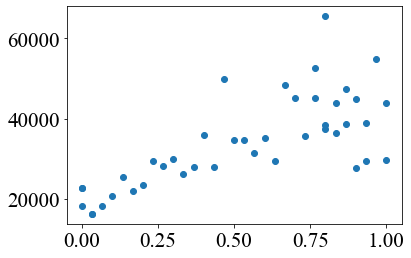

In [51]:
PL100obs.sort_values('alcohol_concentration')
plt.scatter(PL100obs['alcohol_concentration'],PL100obs['max'])

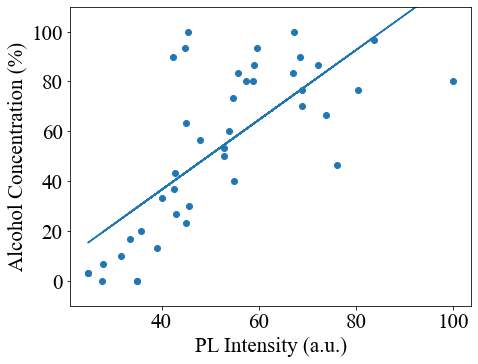

In [38]:
# plt.scatter(PL100obs['alcohol_concentration'],PL100obs['max_ind'])
m1, b1 = np.polyfit(PL100obs['max']/max(PL100obs['max'])*100,PL100obs['alcohol_concentration']*100,1)
plt.figure(figsize=(7.2,5.5))
plt.tight_layout()
plt.scatter(PL100obs['max']/max(PL100obs['max'])*100,PL100obs['alcohol_concentration']*100)
plt.plot(PL100obs['max']/max(PL100obs['max'])*100, m1*PL100obs['max']/max(PL100obs['max'])*100 + b1)
np.average(np.abs(np.abs(m1*PL100obs['max']/max(PL100obs['max'])*100 + b1)-np.abs(PL100obs['alcohol_concentration']*100)))
#plt.xticks(np.arange(550,590,5))
plt.ylim(-10,110)
plt.xlabel('PL Intensity (a.u.)')
plt.ylabel('Alcohol Concentration (%)')
#plt.title('Carbon Dots Solvent Dependence')
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
plt.savefig("PL_int_dependence_fit2.png",dpi=300,facecolor='w')

In [52]:
sm.r2_score(PL100obs['alcohol_concentration']*100,m1*PL100obs['max']/max(PL100obs['max'])*100 + b1)

0.5334264148884387

7.669511353498588


Text(0.5, 1.0, 'PL Linear Fit Accuracy')

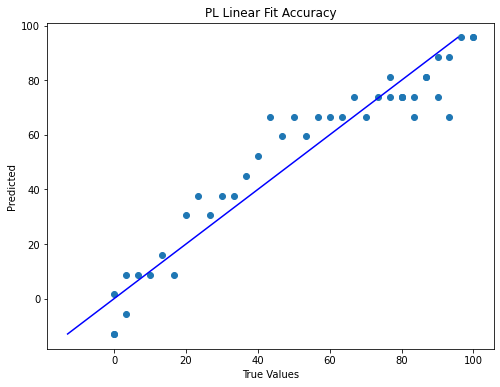

In [39]:
# plt.scatter(PL100obs['alcohol_concentration'],PL100obs['max_ind'])
m, b = np.polyfit(PL100obs['max_ind'],PL100obs['alcohol_concentration']*100,1)
plt.figure(figsize=(8,6))
plt.scatter(PL100obs['alcohol_concentration']*100,m*PL100obs['max_ind'] + b)
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1 = max(max(m*PL100obs['max_ind'] + b), max(PL100obs['alcohol_concentration']))
p2 = min(min(m*PL100obs['max_ind'] + b), min(PL100obs['alcohol_concentration']))
plt.plot([p1, p2], [p1, p2], 'b-')
print(np.average(np.abs(np.abs(m*PL100obs['max_ind'] + b)-np.abs(PL100obs['alcohol_concentration']*100))))
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('PL Linear Fit Accuracy')
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
# plt.savefig("PL_linear_fit?_accuracy.png")

In [53]:
sm.r2_score(PL100obs['alcohol_concentration']*100,m*PL100obs['max_ind'] + b)

0.9115492853623195

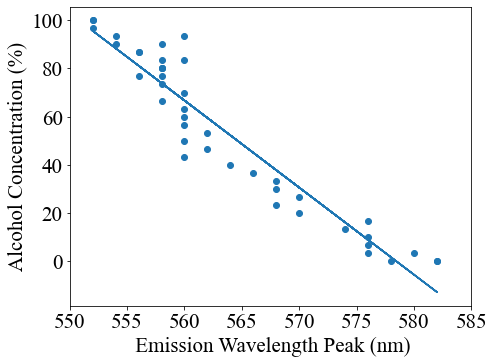

In [40]:
# plt.scatter(PL100obs['alcohol_concentration'],PL100obs['max_ind'])
m, b = np.polyfit(PL100obs['max_ind'],PL100obs['alcohol_concentration']*100,1)
plt.figure(figsize=(7.2,5.5))
plt.tight_layout()
plt.scatter(PL100obs['max_ind'],PL100obs['alcohol_concentration']*100)
plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
np.average(np.abs(np.abs(m*PL100obs['max_ind'] + b)-np.abs(PL100obs['alcohol_concentration']*100)))
plt.xticks(np.arange(550,590,5))
plt.xlabel(' Emission Wavelength Peak (nm)')
plt.ylabel('Alcohol Concentration (%)')
#plt.title('Carbon Dots Solvent Dependence')
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
plt.savefig("PL_dependence_fit2.png",dpi=300,facecolor='w')

In [54]:
LTobs=df3.query('CD_amount==100 & file_name.str.contains("obs").values & typ.str.contains("LT450").values').append(df3.query('CD_amount==100 & file_name.str.contains("obs").values & typ.str.contains("LT405").values'))
LTobs=LTobs.sample(frac=1)

In [55]:
LTobs.sort_values('alcohol_concentration')

,alcohol_concentration,CD_amount,typ,file_name,spec
196,0.000000,100.0,LT450,obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwater_...,"[[0, 40], [1, 40], [2, 47], [3, 43], [4, 39], ..."
75,0.000000,100.0,LT405,obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwater_...,"[[0, 36], [1, 36], [2, 45], [3, 43], [4, 41], ..."
174,0.000000,100.0,LT450,obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwater_...,"[[0, 35], [1, 35], [2, 35], [3, 40], [4, 37], ..."
101,0.033333,100.0,LT405,obs2nm_CD032_0.5_100ul_100ulethanol_2900ulwate...,"[[0, 104], [1, 104], [2, 117], [3, 119], [4, 1..."
235,0.033333,100.0,LT450,obs2nm_CD032_0.5_100ul_100ulethanol_2900ulwate...,"[[0, 62], [1, 62], [2, 73], [3, 73], [4, 71], ..."
...,...,...,...,...,...
184,0.933333,100.0,LT405,obs2nm_CD032_0.5_100ul_2800ulethanol_200ulwate...,"[[0, 59], [1, 59], [2, 66], [3, 52], [4, 64], ..."
76,0.933333,100.0,LT450,obs2nm_CD032_0.5_100ul_2800ulethanol_200ulwate...,"[[0, 66], [1, 66], [2, 63], [3, 79], [4, 64], ..."
230,0.966667,100.0,LT450,obs2nm_CD032_0.5_100ul_2900ulethanol_100ulwate...,"[[0, 83], [1, 83], [2, 62], [3, 79], [4, 79], ..."
142,1.000000,100.0,LT450,obs2nm_CD032_0.5_100ul_3000ulethanol_0ulwater_...,"[[0, 62], [1, 62], [2, 77], [3, 77], [4, 73], ..."


plt.plot(LTobs.iloc[0]['spec'][38:,0]/1023*200,LTobs.iloc[0]['spec'][38:,1])
plt.plot(xs, monoExp(LTobs.iloc[0]['spec'][38:,0]/1023*200, m, t, b), '--', label="fitted")
np.argmax(LTobs.iloc[0]['spec'][:,1])

In [57]:
LTobs['lifetime']=LTobs.apply(lambda x: monoexp_dec_df(x['spec'],x,'spec'), axis=1)

193 spec
3.552987031169343
65 spec
3.89931522375287
43 spec
3.9157139701701786
75 spec
1.915314044818282
225 spec
3.2681645662814
165 spec
3.5239348031131494
87 spec
3.451193136902418
115 spec
3.761092430430949
182 spec
3.7917291781088935
62 spec
2.6522270982300435
81 spec
3.8658593210487098
83 spec
3.7022767345202805
77 spec
3.8548280031082705
102 spec
3.1399480663675177
154 spec
3.7126659412138827
168 spec
3.4799863382233753
70 spec
3.6907197202230777
200 spec
3.877717246348277
157 spec
2.9118214947272696
60 spec
2.2739842865876154
95 spec
2.162208456447111
145 spec
2.647967337762799
98 spec
3.654796903719694
112 spec
3.793404267944692
39 spec
3.333090053987789
96 spec
3.720624707585038
192 spec
3.8377895166572973
31 spec
3.426968773684045
46 spec
2.5277749832849614
32 spec
3.599413390413024
211 spec
3.7655626166455165
208 spec
2.8157845302320097
230 spec
3.9944182785697575
76 spec
3.87388049389382
101 spec
2.147402370365181
196 spec
1.924322865403793
142 spec
4.121254309593757
82 sp

In [58]:
argmax=np.argmax(LTobs.iloc[0]['spec'][:,1])
xv=np.asarray((LTobs.iloc[0]['spec'][argmax:,0]-LTobs.iloc[0]['spec'][argmax-1,0])/1023*200, dtype=np.longdouble)
yv=np.asarray(LTobs.iloc[0]['spec'][argmax:,1]/65535, dtype=np.longdouble)

In [59]:
yv

array([1.00000000e+00, 9.84252689e-01, 9.48363470e-01, 8.95506218e-01,
       8.43564508e-01, 8.00076295e-01, 7.58587015e-01, 7.23353933e-01,
       6.80308232e-01, 6.45456626e-01, 6.04684520e-01, 5.71465629e-01,
       5.40596628e-01, 5.15953307e-01, 4.86976425e-01, 4.65461204e-01,
       4.36194400e-01, 4.12344549e-01, 3.91378653e-01, 3.70534829e-01,
       3.53490501e-01, 3.36964981e-01, 3.18135348e-01, 2.93202106e-01,
       2.77393759e-01, 2.63004501e-01, 2.50614176e-01, 2.34836347e-01,
       2.23712520e-01, 2.09597925e-01, 2.01647974e-01, 1.89639124e-01,
       1.76668956e-01, 1.68215457e-01, 1.58617533e-01, 1.47753109e-01,
       1.41603723e-01, 1.35667964e-01, 1.29503319e-01, 1.22804608e-01,
       1.10872053e-01, 1.07057298e-01, 1.01792935e-01, 9.69558251e-02,
       9.16304265e-02, 8.48859388e-02, 8.10864424e-02, 7.60204471e-02,
       7.36247807e-02, 6.79636835e-02, 6.46829938e-02, 6.09750515e-02,
       5.70992599e-02, 5.27962158e-02, 5.22621500e-02, 4.84473945e-02,
      

In [60]:
p0=(1,3,0.002)

In [61]:
params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0)
params
m, t, b = params

38

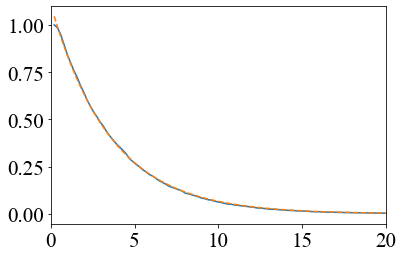

In [62]:
plt.plot(xv,yv) 
plt.plot(xv, monoExp(xv, m, t, b), '--', label="fitted") 
plt.xlim(0,20)
np.argmax(LTobs.iloc[0]['spec'][:,1])

3.552987034560503


3.552987034560503

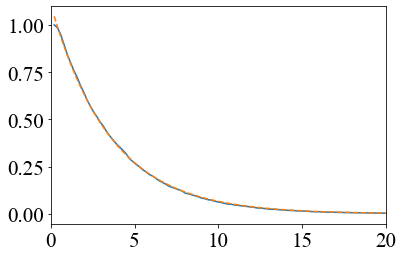

In [63]:
monoexp_dec(LTobs.iloc[0]['spec'])

In [64]:
LTobs.sort_values('alcohol_concentration')

,alcohol_concentration,CD_amount,typ,file_name,spec,lifetime
196,0.000000,100.0,LT450,obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwater_...,"[[0, 40], [1, 40], [2, 47], [3, 43], [4, 39], ...",1.924323
75,0.000000,100.0,LT405,obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwater_...,"[[0, 36], [1, 36], [2, 45], [3, 43], [4, 41], ...",1.915314
174,0.000000,100.0,LT450,obs2nm_CD032_0.5_100ul_0ulethanol_3000ulwater_...,"[[0, 35], [1, 35], [2, 35], [3, 40], [4, 37], ...",1.836239
101,0.033333,100.0,LT405,obs2nm_CD032_0.5_100ul_100ulethanol_2900ulwate...,"[[0, 104], [1, 104], [2, 117], [3, 119], [4, 1...",2.147402
235,0.033333,100.0,LT450,obs2nm_CD032_0.5_100ul_100ulethanol_2900ulwate...,"[[0, 62], [1, 62], [2, 73], [3, 73], [4, 71], ...",2.048889
...,...,...,...,...,...,...
184,0.933333,100.0,LT405,obs2nm_CD032_0.5_100ul_2800ulethanol_200ulwate...,"[[0, 59], [1, 59], [2, 66], [3, 52], [4, 64], ...",3.461400
76,0.933333,100.0,LT450,obs2nm_CD032_0.5_100ul_2800ulethanol_200ulwate...,"[[0, 66], [1, 66], [2, 63], [3, 79], [4, 64], ...",3.873880
230,0.966667,100.0,LT450,obs2nm_CD032_0.5_100ul_2900ulethanol_100ulwate...,"[[0, 83], [1, 83], [2, 62], [3, 79], [4, 79], ...",3.994418
142,1.000000,100.0,LT450,obs2nm_CD032_0.5_100ul_3000ulethanol_0ulwater_...,"[[0, 62], [1, 62], [2, 77], [3, 77], [4, 73], ...",4.121254


In [65]:
def plot_lt(ind):
  argmax=np.argmax(LTobs.iloc[ind]['spec'][:,1])
  xv=np.asarray((LTobs.iloc[ind]['spec'][argmax:,0]-LTobs.iloc[ind]['spec'][argmax-1,0])/1023*200, dtype=np.longdouble)
  yv=np.asarray(LTobs.iloc[ind]['spec'][argmax:,1]/65535, dtype=np.longdouble)
  p0=(1,3,0.002)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0)
  m, t, b = params
  plt.plot(xv,yv) 
  plt.plot(xv, monoExp(xv, m, t, b), '--', label="fitted") 
  plt.xlim(0,20)
  # plt.savefig("png/LT_fit"+str(ind)+".png")
  plt.close()

In [65]:
for i in range(len(LTobs)):
  plot_lt(i)

In [66]:
LTobs.query('typ.str.contains("LT450").values')

,alcohol_concentration,CD_amount,typ,file_name,spec,lifetime
65,0.900000,100.0,LT450,obs2nm_CD032_0.5_100ul_2700ulethanol_300ulwate...,"[[0, 75], [1, 75], [2, 75], [3, 69], [4, 58], ...",3.899315
43,0.900000,100.0,LT450,obs2nm_CD032_0.5_100ul_2700ulethanol_300ulwate...,"[[0, 63], [1, 63], [2, 68], [3, 59], [4, 68], ...",3.915714
225,0.400000,100.0,LT450,obs2nm_CD032_0.5_100ul_1200ulethanol_1800ulwat...,"[[0, 51], [1, 51], [2, 62], [3, 58], [4, 60], ...",3.268165
165,0.533333,100.0,LT450,obs2nm_CD032_0.5_100ul_1600ulethanol_1400ulwat...,"[[0, 66], [1, 66], [2, 79], [3, 81], [4, 79], ...",3.523935
87,0.933333,100.0,LT450,obs2nm_CD032_0.5_100ul_2800ulethanol_200ulwate...,"[[0, 52], [1, 52], [2, 68], [3, 56], [4, 58], ...",3.451193
62,0.200000,100.0,LT450,obs2nm_CD032_0.5_100ul_600ulethanol_2400ulwate...,"[[0, 77], [1, 77], [2, 64], [3, 64], [4, 69], ...",2.652227
77,0.800000,100.0,LT450,obs2nm_CD032_0.5_100ul_2400ulethanol_600ulwate...,"[[0, 88], [1, 88], [2, 99], [3, 99], [4, 92], ...",3.854828
102,0.333333,100.0,LT450,obs2nm_CD032_0.5_100ul_1000ulethanol_2000ulwat...,"[[0, 75], [1, 75], [2, 79], [3, 81], [4, 70], ...",3.139948
154,0.766667,100.0,LT450,obs2nm_CD032_0.5_100ul_2300ulethanol_700ulwate...,"[[0, 70], [1, 70], [2, 65], [3, 83], [4, 62], ...",3.712666
70,0.800000,100.0,LT450,obs2nm_CD032_0.5_100ul_2400ulethanol_600ulwate...,"[[0, 63], [1, 63], [2, 68], [3, 74], [4, 64], ...",3.690720


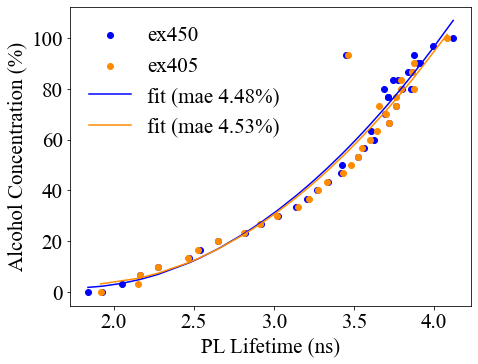

In [81]:
plt.close()
plt.figure(figsize=(7.2,5.5))
plt.tight_layout()
x450=LTobs.query('typ.str.contains("LT450").values').sort_values('lifetime')['lifetime']
y450=LTobs.query('typ.str.contains("LT450").values').sort_values('lifetime')['alcohol_concentration']*100
x405=LTobs.query('typ.str.contains("LT405").values').sort_values('lifetime')['lifetime']
y405=LTobs.query('typ.str.contains("LT405").values').sort_values('lifetime')['alcohol_concentration']*100
a450,m450, b450 = np.polyfit(x450,y450,2)
a405,m405, b405 = np.polyfit(x405,y405,2)
plt.scatter(x450,y450,color='blue',label='ex450')
plt.scatter(x405,y405,color='darkorange',label='ex405')
yfit450=np.array(a450*np.square(x450)+m450*x450+b450)
yfit405=np.array(a405*np.square(x405)+m405*x405+b405)
plt.plot(x450, yfit450,color='blue',label='fit (mae 4.48%)')
plt.plot(x405, yfit405,color='darkorange',label='fit (mae 4.53%)')
plt.xlabel('PL Lifetime (ns)')
plt.ylabel('Alcohol Concentration (%)')
#plt.title('Carbon Dots Solvent Lifetime Dependence')
plt.legend(frameon=False)
plt.savefig("LT_dependence_fit_3.png",dpi=300,facecolor='w',bbox_inches="tight")

4.529124732844556
4.480208292782584


/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_13717/3411780425.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1450, p2450], [p1450, p2450], 'b-',color='blue')
/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_13717/3411780425.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1405, p2405], [p1405, p2405], 'b-',color='darkorange')


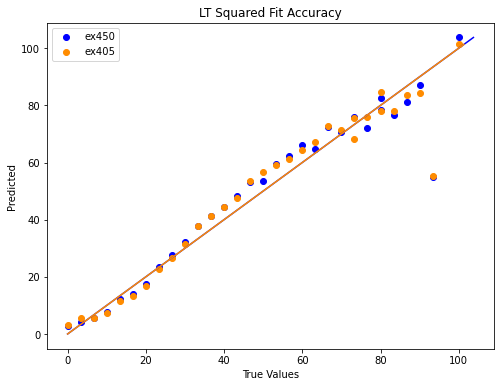

In [42]:
m, b = np.polyfit(PL100obs['max_ind'],PL100obs['alcohol_concentration']*100,1)
plt.figure(figsize=(8,6))
plt.scatter(y450,yfit450,label='ex450',color='blue')
plt.scatter(y405,yfit405,label='ex405',color='darkorange')
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1450 = max(max(yfit450), max(y450))
p2450 = min(min(yfit450), min(y450))
plt.plot([p1450, p2450], [p1450, p2450], 'b-',color='blue')
p1405 = max(max(yfit405), max(y405))
p2405 = min(min(yfit405), min(y405))
plt.plot([p1405, p2405], [p1405, p2405], 'b-',color='darkorange')

print(np.average(np.abs(np.abs(yfit405)-np.abs(y405))))
print(np.average(np.abs(np.abs(yfit450)-np.abs(y450))))
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('LT Squared Fit Accuracy')
plt.legend()
# plt.savefig("LT_squared_fit_accuracy.png")

In [82]:
LTobs.loc[2328]['spec']
LTobs.loc[2381]['spec'][:,0]/1023*200, LTobs.loc[2381]['spec'][:,1]

(array([0.00000000e+00, 1.95503421e-01, 3.91006843e-01, ...,
        1.99608993e+02, 1.99804497e+02, 2.00000000e+02]),
 array([62., 62., 77., ..., 58., 66., 68.]))

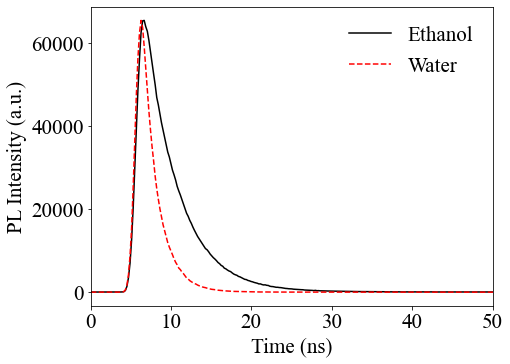

In [80]:
plt.figure(figsize=(7.2,5.5))
plt.tight_layout()
plt.plot(LTobs.loc[142]['spec'][:,0]/1023*200, LTobs.loc[142]['spec'][:,1],'-',color='black',label='Ethanol')
plt.plot(LTobs.loc[196]['spec'][:,0]/1023*200, LTobs.loc[196]['spec'][:,1],'--',color='red',label='Water')
#plt.plot([p1450, p2450], [p1450, p2450], 'b-',color='blue')

#plt.plot([p1405, p2405], [p1405, p2405], 'b-',color='darkorange')

plt.xlim(0,50)
plt.xlabel('Time (ns)')
plt.ylabel('PL Intensity (a.u.)')
#plt.title('Carbon Dots PL Decay')
plt.legend(frameon=False)
plt.savefig("water_ethanol2.png",dpi=300,facecolor='w',bbox_inches="tight")

188.10050470821798


Text(0.5, 1.0, 'PL Linear Fit Accuracy')

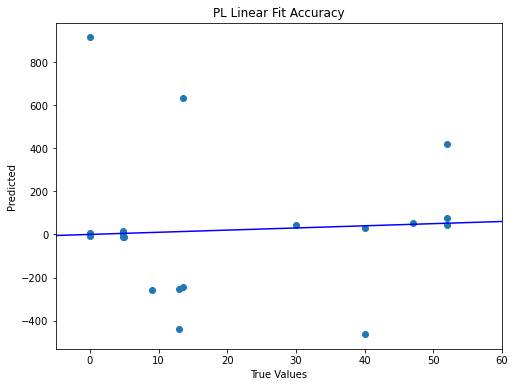

In [43]:
# plt.scatter(PL100obs['alcohol_concentration'],PL100obs['max_ind'])
m, b = np.polyfit(PL100obs['max_ind'],PL100obs['alcohol_concentration']*100,1)
plt.figure(figsize=(8,6))
plt.scatter(bev_feature['alcohol_concentration']*100,m*bev_feature['100_max_ind'] + b)
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1 = max(max(m*bev_feature['100_max_ind'] + b), max(bev_feature['alcohol_concentration']*100))
p2 = min(min(m*bev_feature['100_max_ind'] + b), min(bev_feature['alcohol_concentration']*100))
plt.plot([p1, p2], [p1, p2], 'b-')
print(np.average(np.abs(np.abs(m*bev_feature['100_max_ind'] + b)-np.abs(bev_feature['alcohol_concentration']*100))))
plt.xlim(-5,60)
# plt.ylim(-5,60)
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('PL Linear Fit Accuracy')
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
# plt.savefig("PL_linear_fit?_accuracy.png")

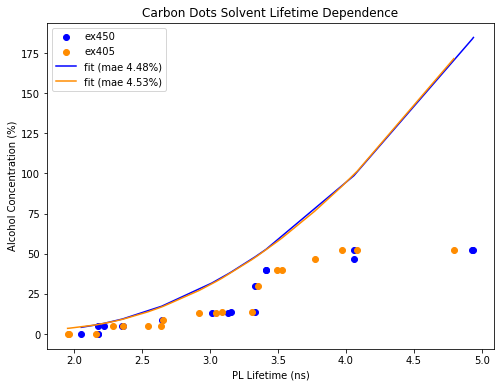

In [46]:
plt.close()
plt.figure(figsize=(8,6))
x450obs=LTobs.query('typ.str.contains("LT450").values').sort_values('lifetime')['lifetime']
y450obs=LTobs.query('typ.str.contains("LT450").values').sort_values('lifetime')['alcohol_concentration']*100
x405obs=LTobs.query('typ.str.contains("LT405").values').sort_values('lifetime')['lifetime']
y405obs=LTobs.query('typ.str.contains("LT405").values').sort_values('lifetime')['alcohol_concentration']*100
x405bev=bev_feature['100_LT405'].sort_values()
y405bev=bev_feature['alcohol_concentration'].sort_values()*100
x450bev=bev_feature['100_LT450'].sort_values()
y450bev=bev_feature['alcohol_concentration'].sort_values()*100
a450,m450, b450 = np.polyfit(x450obs,y450obs,2)
a405,m405, b405 = np.polyfit(x405obs,y405obs,2)
plt.scatter(x450bev,y450bev,color='blue',label='ex450')
plt.scatter(x405bev,y405bev,color='darkorange',label='ex405')
yfit450bev=np.array(a450*np.square(x450bev)+m450*x450bev+b450)
yfit405bev=np.array(a405*np.square(x405bev)+m405*x405bev+b405)
plt.plot(x450bev, yfit450bev,color='blue',label='fit (mae 4.48%)')
plt.plot(x405bev, yfit405bev,color='darkorange',label='fit (mae 4.53%)')
plt.xlabel('PL Lifetime (ns)')
plt.ylabel('Alcohol Concentration (%)')
plt.title('Carbon Dots Solvent Lifetime Dependence')
plt.legend()

22.71070123801698
28.667018925796427


/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_13717/1124476747.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1450, p2450], [p1450, p2450], 'b-',color='blue')
/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_13717/1124476747.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1405, p2405], [p1405, p2405], 'b-',color='darkorange')


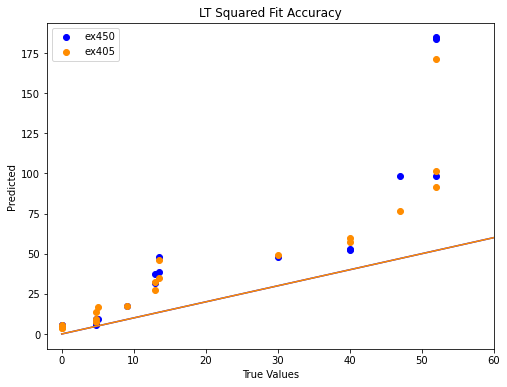

In [45]:
plt.close()
plt.figure(figsize=(8,6))
plt.scatter(y450bev,yfit450bev,label='ex450',color='blue')
plt.scatter(y405bev,yfit405bev,label='ex405',color='darkorange')
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1450 = max(max(yfit450bev), max(y450bev))
p2450 = min(min(yfit450bev), min(y450bev))
plt.plot([p1450, p2450], [p1450, p2450], 'b-',color='blue')
p1405 = max(max(yfit405bev), max(y405bev))
p2405 = min(min(yfit405bev), min(y405bev))
plt.plot([p1405, p2405], [p1405, p2405], 'b-',color='darkorange')

print(np.average(np.abs(yfit405bev)-np.abs(y405bev)))
print(np.average(np.abs(yfit450bev)-np.abs(y450bev)))
plt.xlim(-2,60)
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('LT Squared Fit Accuracy')
plt.legend()

In [16]:
beverages

,beverage,alcohol_concentration,blank_LT405spec,blank_LT450spec,blank_PLspec,300_LT405spec,300_LT450spec,300_PLspec,150_LT405spec,150_LT450spec,150_PLspec,100_LT405spec,100_LT450spec,100_PLspec
8,absolut,0.400,"[[0, 85], [1, 85], [2, 103], [3, 76], [4, 82],...","[[0, 104], [1, 104], [2, 90], [3, 106], [4, 78...","[[300, 1751, 3004, 4043, 5212, 6410, 7037, 703...","[[0, 90], [1, 90], [2, 95], [3, 91], [4, 107],...","[[0, 98], [1, 98], [2, 95], [3, 98], [4, 104],...","[[300, 13, 13, 4, 0, 0, 0, 2, 4, 0, 0, 2, 0, 0...","[[0, 66], [1, 66], [2, 68], [3, 79], [4, 69], ...","[[0, 64], [1, 64], [2, 63], [3, 54], [4, 75], ...","[[300, 0, 5, 2, 8, 0, 7, 0, 1, 7, 5, 1, 8, 0, ...","[[0, 58], [1, 58], [2, 60], [3, 67], [4, 53], ...","[[0, 71], [1, 71], [2, 64], [3, 66], [4, 77], ...","[[300, 0, 9, 1, 23, 4, 25, 0, 5, 0, 6, 0, 17, ..."
3,luzhoulaojiao,0.520,"[[0, 98], [1, 97], [2, 103], [3, 98], [4, 98],...","[[0, 332], [1, 333], [2, 390], [3, 440], [4, 4...","[[300, 790, 815, 777, 1085, 1938, 2368, 2026, ...","[[0, 159], [1, 157], [2, 165], [3, 139], [4, 1...","[[0, 132], [1, 132], [2, 167], [3, 150], [4, 1...","[[300, 0, 11, 0, 0, 0, 3, 9, 0, 0, 0, 2, 0, 0,...","[[0, 93], [1, 94], [2, 95], [3, 93], [4, 90], ...","[[0, 103], [1, 103], [2, 103], [3, 98], [4, 11...","[[300, 1, 8, 7, 15, 4, 10, 0, 17, 12, 12, 1, 2...","[[0, 90], [1, 90], [2, 88], [3, 100], [4, 103]...","[[0, 89], [1, 90], [2, 85], [3, 99], [4, 101],...","[[300, 8, 36, 101, 123, 133, 141, 137, 159, 19..."
1,luzhoulaojiao,0.520,"[[0, 97], [1, 97], [2, 102], [3, 98], [4, 97],...","[[0, 320], [1, 320], [2, 379], [3, 424], [4, 4...","[[300, 786, 816, 776, 1084, 1930, 2352, 2014, ...","[[0, 278], [1, 278], [2, 240], [3, 272], [4, 2...","[[0, 130], [1, 130], [2, 167], [3, 148], [4, 1...","[[300, 0, 0, 8, 14, 0, 0, 1, 0, 0, 14, 0, 0, 1...","[[0, 91], [1, 91], [2, 93], [3, 91], [4, 87], ...","[[0, 100], [1, 100], [2, 100], [3, 96], [4, 11...","[[300, 0, 0, 0, 9, 0, 1, 7, 11, 20, 11, 23, 29...","[[0, 66], [1, 66], [2, 66], [3, 73], [4, 65], ...","[[0, 88], [1, 88], [2, 83], [3, 98], [4, 100],...","[[300, 0, 0, 3, 0, 0, 5, 0, 0, 0, 0, 0, 0, 7, ..."
11,whitewine,0.135,"[[0, 88], [1, 88], [2, 86], [3, 86], [4, 91], ...","[[0, 92], [1, 92], [2, 82], [3, 80], [4, 89], ...","[[300, 9, 30, 40, 79, 109, 0, 0, 0, 0, 64, 50,...","[[0, 485], [1, 483], [2, 542], [3, 507], [4, 4...","[[0, 2287], [1, 2294], [2, 2179], [3, 2215], [...","[[300, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...","[[0, 106], [1, 107], [2, 114], [3, 105], [4, 1...","[[0, 821], [1, 821], [2, 783], [3, 679], [4, 7...","[[300, 0, 10, 3, 9, 8, 0, 1, 8, 0, 6, 12, 6, 0...","[[0, 64], [1, 64], [2, 59], [3, 58], [4, 59], ...","[[0, 199], [1, 200], [2, 225], [3, 215], [4, 2...","[[300, 0, 21, 0, 0, 20, 9, 15, 0, 0, 1, 0, 1, ..."
0,limoncello,0.300,"[[0, 42], [1, 42], [2, 45], [3, 37], [4, 39], ...","[[0, 37], [1, 37], [2, 29], [3, 41], [4, 36], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 5, 0, 20, 0, 0, 10...","[[0, 57], [1, 57], [2, 68], [3, 55], [4, 55], ...","[[0, 52], [1, 52], [2, 60], [3, 66], [4, 75], ...","[[300, 2, 0, 3, 5, 0, 14, 0, 0, 0, 0, 13, 0, 1...","[[0, 61], [1, 61], [2, 70], [3, 72], [4, 68], ...","[[0, 49], [1, 49], [2, 62], [3, 62], [4, 55], ...","[[300, 0, 6, 2, 0, 0, 0, 15, 0, 0, 0, 10, 7, 0...","[[0, 57], [1, 57], [2, 66], [3, 62], [4, 64], ...","[[0, 56], [1, 56], [2, 59], [3, 68], [4, 47], ...","[[300, 0, 7, 10, 0, 1, 14, 2, 0, 12, 0, 0, 7, ..."
16,bombaygin,0.470,"[[0, 75], [1, 75], [2, 83], [3, 70], [4, 70], ...","[[0, 75], [1, 75], [2, 70], [3, 78], [4, 78], ...","[[300, 781, 980, 1442, 1835, 2815, 3929, 3004,...","[[0, 140], [1, 140], [2, 130], [3, 153], [4, 1...","[[0, 105], [1, 105], [2, 145], [3, 111], [4, 1...","[[300, 3, 7, 14, 0, 0, 1, 0, 4, 8, 7, 0, 6, 4,...","[[0, 73], [1, 73], [2, 83], [3, 83], [4, 96], ...","[[0, 69], [1, 69], [2, 80], [3, 71], [4, 84], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 64], [1, 64], [2, 59], [3, 67], [4, 53], ...","[[0, 62], [1, 62], [2, 71], [3, 58], [4, 72], ..

Text(0, 0.5, 'Excitation Wavelength (nm)')

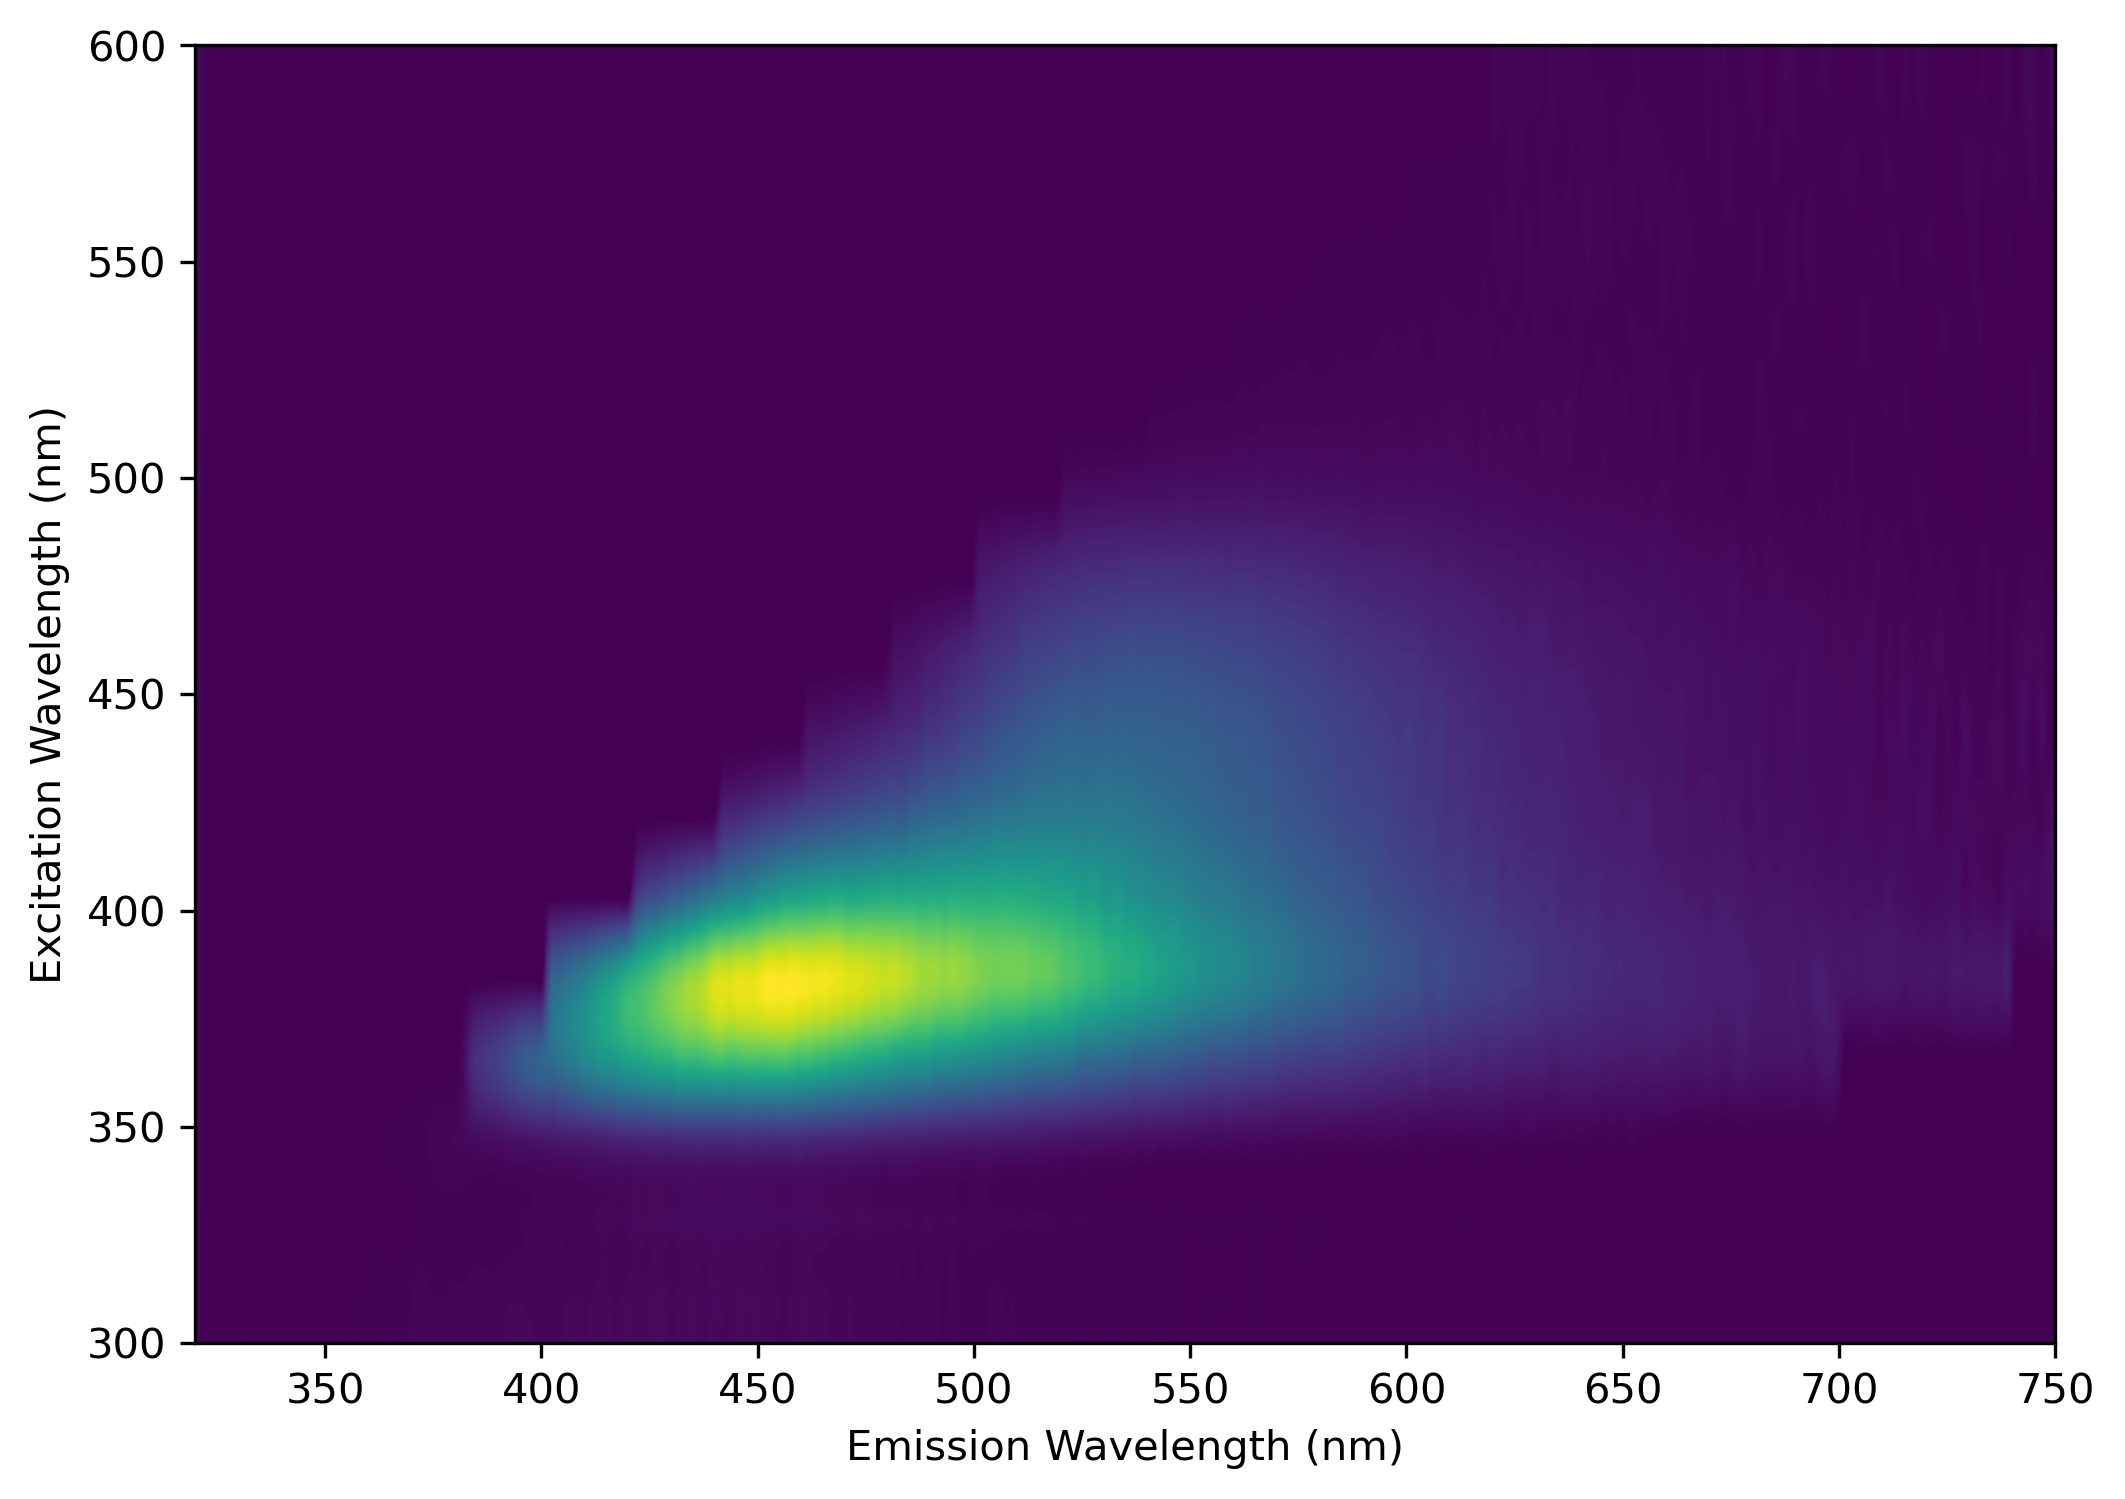

In [4]:
figu=beverages.loc[11,'blank_PLspec']
plt.figure(figsize=(8,6),dpi=300)
plt.imshow(figu,extent=[320,750,300,600],origin="lower",interpolation='spline16')	
plt.xlabel("Emission Wavelength (nm)")
plt.ylabel("Excitation Wavelength (nm)")
#plt.savefig('csv/png/whitewine_blank_PLspec.png',bbox_inches = "tight",facecolor='w')
#     plt.close()

In [84]:
onemat.sort_values('alcohol_concentration')

,alcohol_concentration,blank_LT405spec,blank_LT450spec,blank_PLspec,300_LT405spec,300_LT450spec,300_PLspec,100_LT405spec,100_LT450spec,100_PLspec,150_LT405spec,150_LT450spec,150_PLspec
35,0.000000,"[[0.0, 64.0], [1.0, 64.0], [2.0, 59.0], [3.0, ...","[[0.0, 30.0], [1.0, 31.0], [2.0, 42.0], [3.0, ...","[[300.0, 2058.0, 1988.0, 2128.0, 2273.0, 2658....","[[0, 45], [1, 45], [2, 62], [3, 56], [4, 54], ...","[[0, 61], [1, 61], [2, 47], [3, 60], [4, 54], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, ...","[[0, 36], [1, 36], [2, 45], [3, 43], [4, 41], ...","[[0, 35], [1, 35], [2, 35], [3, 40], [4, 37], ...","[[300, 9, 13, 14, 19, 9, 1, 15, 12, 0, 12, 8, ...","[[0, 54], [1, 54], [2, 53], [3, 52], [4, 54], ...","[[0, 40], [1, 40], [2, 36], [3, 29], [4, 35], ...","[[300, 0, 2, 0, 0, 0, 9, 6, 15, 0, 0, 3, 11, 1..."
37,0.000000,"[[0.0, 66.0], [1.0, 66.0], [2.0, 56.0], [3.0, ...","[[0.0, 32.0], [1.0, 30.0], [2.0, 45.0], [3.0, ...","[[300.0, 2071.0, 2006.0, 2153.0, 2287.0, 2640....","[[0, 45], [1, 45], [2, 62], [3, 55], [4, 55], ...","[[0, 58], [1, 60], [2, 47], [3, 57], [4, 53], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 35], [1, 37], [2, 43], [3, 44], [4, 40], ...","[[0, 34], [1, 34], [2, 35], [3, 40], [4, 35], ...","[[300, 9, 13, 14, 19, 9, 1, 15, 12, 0, 12, 8, ...","[[0, 52], [1, 53], [2, 51], [3, 49], [4, 51], ...","[[0, 39], [1, 40], [2, 35], [3, 27], [4, 32], ...","[[300, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 2, ..."
36,0.000000,"[[0.0, 63.0], [1.0, 63.0], [2.0, 59.0], [3.0, ...","[[0.0, 33.0], [1.0, 29.0], [2.0, 41.0], [3.0, ...","[[300.0, 2046.0, 1994.0, 2144.0, 2257.0, 2649....","[[0, 42], [1, 42], [2, 60], [3, 55], [4, 55], ...","[[0, 59], [1, 62], [2, 47], [3, 60], [4, 52], ...","[[300, 8, 6, 0, 9, 9, 6, 10, 2, 2, 4, 5, 8, 0,...","[[0, 37], [1, 33], [2, 45], [3, 43], [4, 42], ...","[[0, 40], [1, 40], [2, 47], [3, 43], [4, 39], ...","[[300, 8, 2, 10, 10, 10, 10, 10, 10, 7, 16, 1,...","[[0, 54], [1, 54], [2, 51], [3, 52], [4, 54], ...","[[0, 38], [1, 39], [2, 36], [3, 29], [4, 35], ...","[[300, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, ..."
499,0.006667,"[[0.0, 65.0], [1.0, 65.0], [2.0, 60.0], [3.0, ...","[[0.0, 31.0], [1.0, 32.0], [2.0, 41.0], [3.0, ...","[[300.0, 2069.0, 2020.0, 2121.0, 2301.0, 2651....","[[0, 52], [1, 93], [2, 92], [3, 67], [4, 35], ...","[[0, 68], [1, 76], [2, 90], [3, 25], [4, 11], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, ...","[[0, 41], [1, 8], [2, 7], [3, 79], [4, 88], [5...","[[0, 51], [1, 40], [2, 59], [3, 80], [4, 68], ...","[[300, 12, 10, 13, 14, 7, 2, 13, 12, 2, 9, 7, ...","[[0, 61], [1, 55], [2, 91], [3, 25], [4, 8], [...","[[0, 57], [1, 59], [2, 64], [3, 0], [4, 79], [...","[[300, 3, 0, 0, 0, 0, 5, 3, 13, 1, 0, 2, 10, 1..."
500,0.006667,"[[0.0, 64.0], [1.0, 64.0], [2.0, 59.0], [3.0, ...","[[0.0, 31.0], [1.0, 33.0], [2.0, 43.0], [3.0, ...","[[300.0, 2074.0, 2033.0, 2153.0, 2290.0, 2647....","[[0, 50], [1, 93], [2, 89], [3, 65], [4, 33], ...","[[0, 68], [1, 75], [2, 88], [3, 22], [4, 12], ...","[[300, 3, 9, 0, 6, 4, 3, 6, 0, 6, 7, 7, 2, 1, ...","[[0, 41], [1, 6], [2, 7], [3, 76], [4, 85], [5...","[[0, 6], [1, 23], [2, 0], [3, 55], [4, 4], [5,...","[[300, 3, 3, 8, 8, 12, 5, 10, 12, 5, 14, 1, 7,...","[[0, 59], [1, 53], [2, 91], [3, 23], [4, 8], [...","[[0, 55], [1, 60], [2, 63], [3, 0], [4, 78], [...","[[300, 0, 0, 41, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.993333,"[[0.0, 65.0], [1.0, 63.0], [2.0, 59.0], [3.0, ...","[[0.0, 32.0], [1.0, 31.0], [2.0, 43.0], [3.0, ...","[[300.0, 2082.0, 2045.0, 2150.0, 2318.0, 2670....","[[0, 92], [1, 65], [2, 62], [3, 45], [4, 45], ...","[[0, 78], [1, 105], [2, 131], [3, 79], [4, 84]...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 69], [1, 122], [2, 98], [3, 16], [4, 71],...","[[0, 55], [1, 46], [2, 99], [3, 75], [4, 86], ...","[[300, 1, 0, 0, 6, 0, 10, 8, 10, 5, 8, 25, 16,...","[[0, 43], [1, 72], [2, 31], [3, 94], [4, 80], ...","[[0, 50], [1, 98], [2, 65], [3, 88], [4, 69

In [88]:
beverages

,beverage,alcohol_concentration,blank_LT405spec,blank_LT450spec,blank_PLspec,300_LT405spec,300_LT450spec,300_PLspec,150_LT405spec,150_LT450spec,150_PLspec,100_LT405spec,100_LT450spec,100_PLspec
2,luzhoulaojiao,0.520,"[[0, 98], [1, 98], [2, 104], [3, 99], [4, 98],...","[[0, 328], [1, 329], [2, 387], [3, 435], [4, 4...","[[300, 786, 811, 770, 1085, 1927, 2346, 2007, ...","[[0, 156], [1, 156], [2, 163], [3, 137], [4, 1...","[[0, 194], [1, 194], [2, 232], [3, 247], [4, 2...","[[300, 8, 0, 6, 0, 2, 2, 0, 0, 0, 0, 3, 5, 0, ...","[[0, 92], [1, 93], [2, 95], [3, 92], [4, 89], ...","[[0, 101], [1, 101], [2, 102], [3, 97], [4, 11...","[[300, 2, 8, 7, 15, 4, 11, 0, 17, 13, 13, 2, 2...","[[0, 89], [1, 89], [2, 87], [3, 98], [4, 102],...","[[0, 105], [1, 105], [2, 96], [3, 98], [4, 95]...","[[300, 9, 37, 101, 123, 135, 142, 139, 160, 19..."
6,bitburgerdrive,0.000,"[[0, 88], [1, 88], [2, 83], [3, 85], [4, 87], ...","[[0, 74], [1, 75], [2, 89], [3, 76], [4, 89], ...","[[300, 0, 0, 15, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0,...","[[0, 75], [1, 76], [2, 83], [3, 97], [4, 77], ...","[[0, 69], [1, 70], [2, 108], [3, 99], [4, 102]...","[[300, 0, 0, 4, 0, 0, 2, 4, 0, 0, 0, 0, 10, 0,...","[[0, 55], [1, 55], [2, 72], [3, 51], [4, 52], ...","[[0, 76], [1, 76], [2, 74], [3, 69], [4, 76], ...","[[300, 6, 0, 2, 1, 8, 0, 1, 0, 0, 2, 2, 0, 9, ...","[[0, 74], [1, 73], [2, 79], [3, 102], [4, 91],...","[[0, 103], [1, 103], [2, 109], [3, 88], [4, 10...","[[300, 0, 4, 7, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, ..."
15,chimay,0.090,"[[0, 75], [1, 75], [2, 69], [3, 79], [4, 73], ...","[[0, 54], [1, 54], [2, 50], [3, 71], [4, 62], ...","[[300, 35, 15, 30, 60, 25, 5, 20, 0, 25, 50, 6...","[[0, 164], [1, 164], [2, 173], [3, 188], [4, 1...","[[0, 195], [1, 195], [2, 191], [3, 179], [4, 1...","[[300, 13, 6, 4, 6, 0, 8, 11, 8, 2, 4, 2, 6, 1...","[[0, 104], [1, 104], [2, 110], [3, 89], [4, 97...","[[0, 159], [1, 159], [2, 143], [3, 139], [4, 1...","[[300, 0, 0, 4, 0, 5, 0, 0, 0, 0, 4, 0, 0, 0, ...","[[0, 66], [1, 66], [2, 69], [3, 78], [4, 67], ...","[[0, 81], [1, 81], [2, 85], [3, 88], [4, 88], ...","[[300, 7, 0, 0, 16, 0, 5, 0, 4, 4, 4, 0, 12, 9..."
1,luzhoulaojiao,0.520,"[[0, 97], [1, 97], [2, 102], [3, 98], [4, 97],...","[[0, 320], [1, 320], [2, 379], [3, 424], [4, 4...","[[300, 786, 816, 776, 1084, 1930, 2352, 2014, ...","[[0, 278], [1, 278], [2, 240], [3, 272], [4, 2...","[[0, 130], [1, 130], [2, 167], [3, 148], [4, 1...","[[300, 0, 0, 8, 14, 0, 0, 1, 0, 0, 14, 0, 0, 1...","[[0, 91], [1, 91], [2, 93], [3, 91], [4, 87], ...","[[0, 100], [1, 100], [2, 100], [3, 96], [4, 11...","[[300, 0, 0, 0, 9, 0, 1, 7, 11, 20, 11, 23, 29...","[[0, 66], [1, 66], [2, 66], [3, 73], [4, 65], ...","[[0, 88], [1, 88], [2, 83], [3, 98], [4, 100],...","[[300, 0, 0, 3, 0, 0, 5, 0, 0, 0, 0, 0, 0, 7, ..."
13,bitburgerpils,0.048,"[[0, 83], [1, 83], [2, 91], [3, 100], [4, 102]...","[[0, 72], [1, 72], [2, 77], [3, 87], [4, 93], ...","[[300, 0, 0, 15, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0,...","[[0, 128], [1, 127], [2, 140], [3, 145], [4, 1...","[[0, 138], [1, 139], [2, 180], [3, 131], [4, 1...","[[300, 6, 14, 0, 7, 7, 3, 9, 0, 0, 5, 17, 11, ...","[[0, 80], [1, 80], [2, 76], [3, 76], [4, 78], ...","[[0, 84], [1, 85], [2, 90], [3, 91], [4, 102],...","[[300, 8, 2, 0, 0, 0, 0, 7, 5, 6, 0, 4, 1, 0, ...","[[0, 147], [1, 147], [2, 153], [3, 126], [4, 1...","[[0, 96], [1, 96], [2, 107], [3, 106], [4, 118...","[[300, 8, 6, 15, 5, 0, 2, 12, 0, 0, 0, 3, 0, 0..."
5,bitburgerdrive,0.000,"[[0, 87], [1, 87], [2, 83], [3, 85], [4, 87], ...","[[0, 74], [1, 74], [2, 88], [3, 77], [4, 88], ...","[[300, 0, 0, 15, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0,...","[[0, 78], [1, 78], [2, 87], [3, 102], [4, 81],...","[[0, 68], [1, 68], [2, 106], [3, 97], [4, 99],...","[[300, 0, 0, 4, 0, 0, 2, 5, 0, 0, 0, 0, 10, 0,...","[[0, 97], [1, 97], [2, 92], [3, 96], [4, 95], ...","[[0, 79], [1, 79], [2, 76], [3, 72], [4, 79], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 68], [1, 68], [2, 80], [3, 76], [4, 75], ...","[[0, 61], [1, 61], [2, 77], [3, 75],

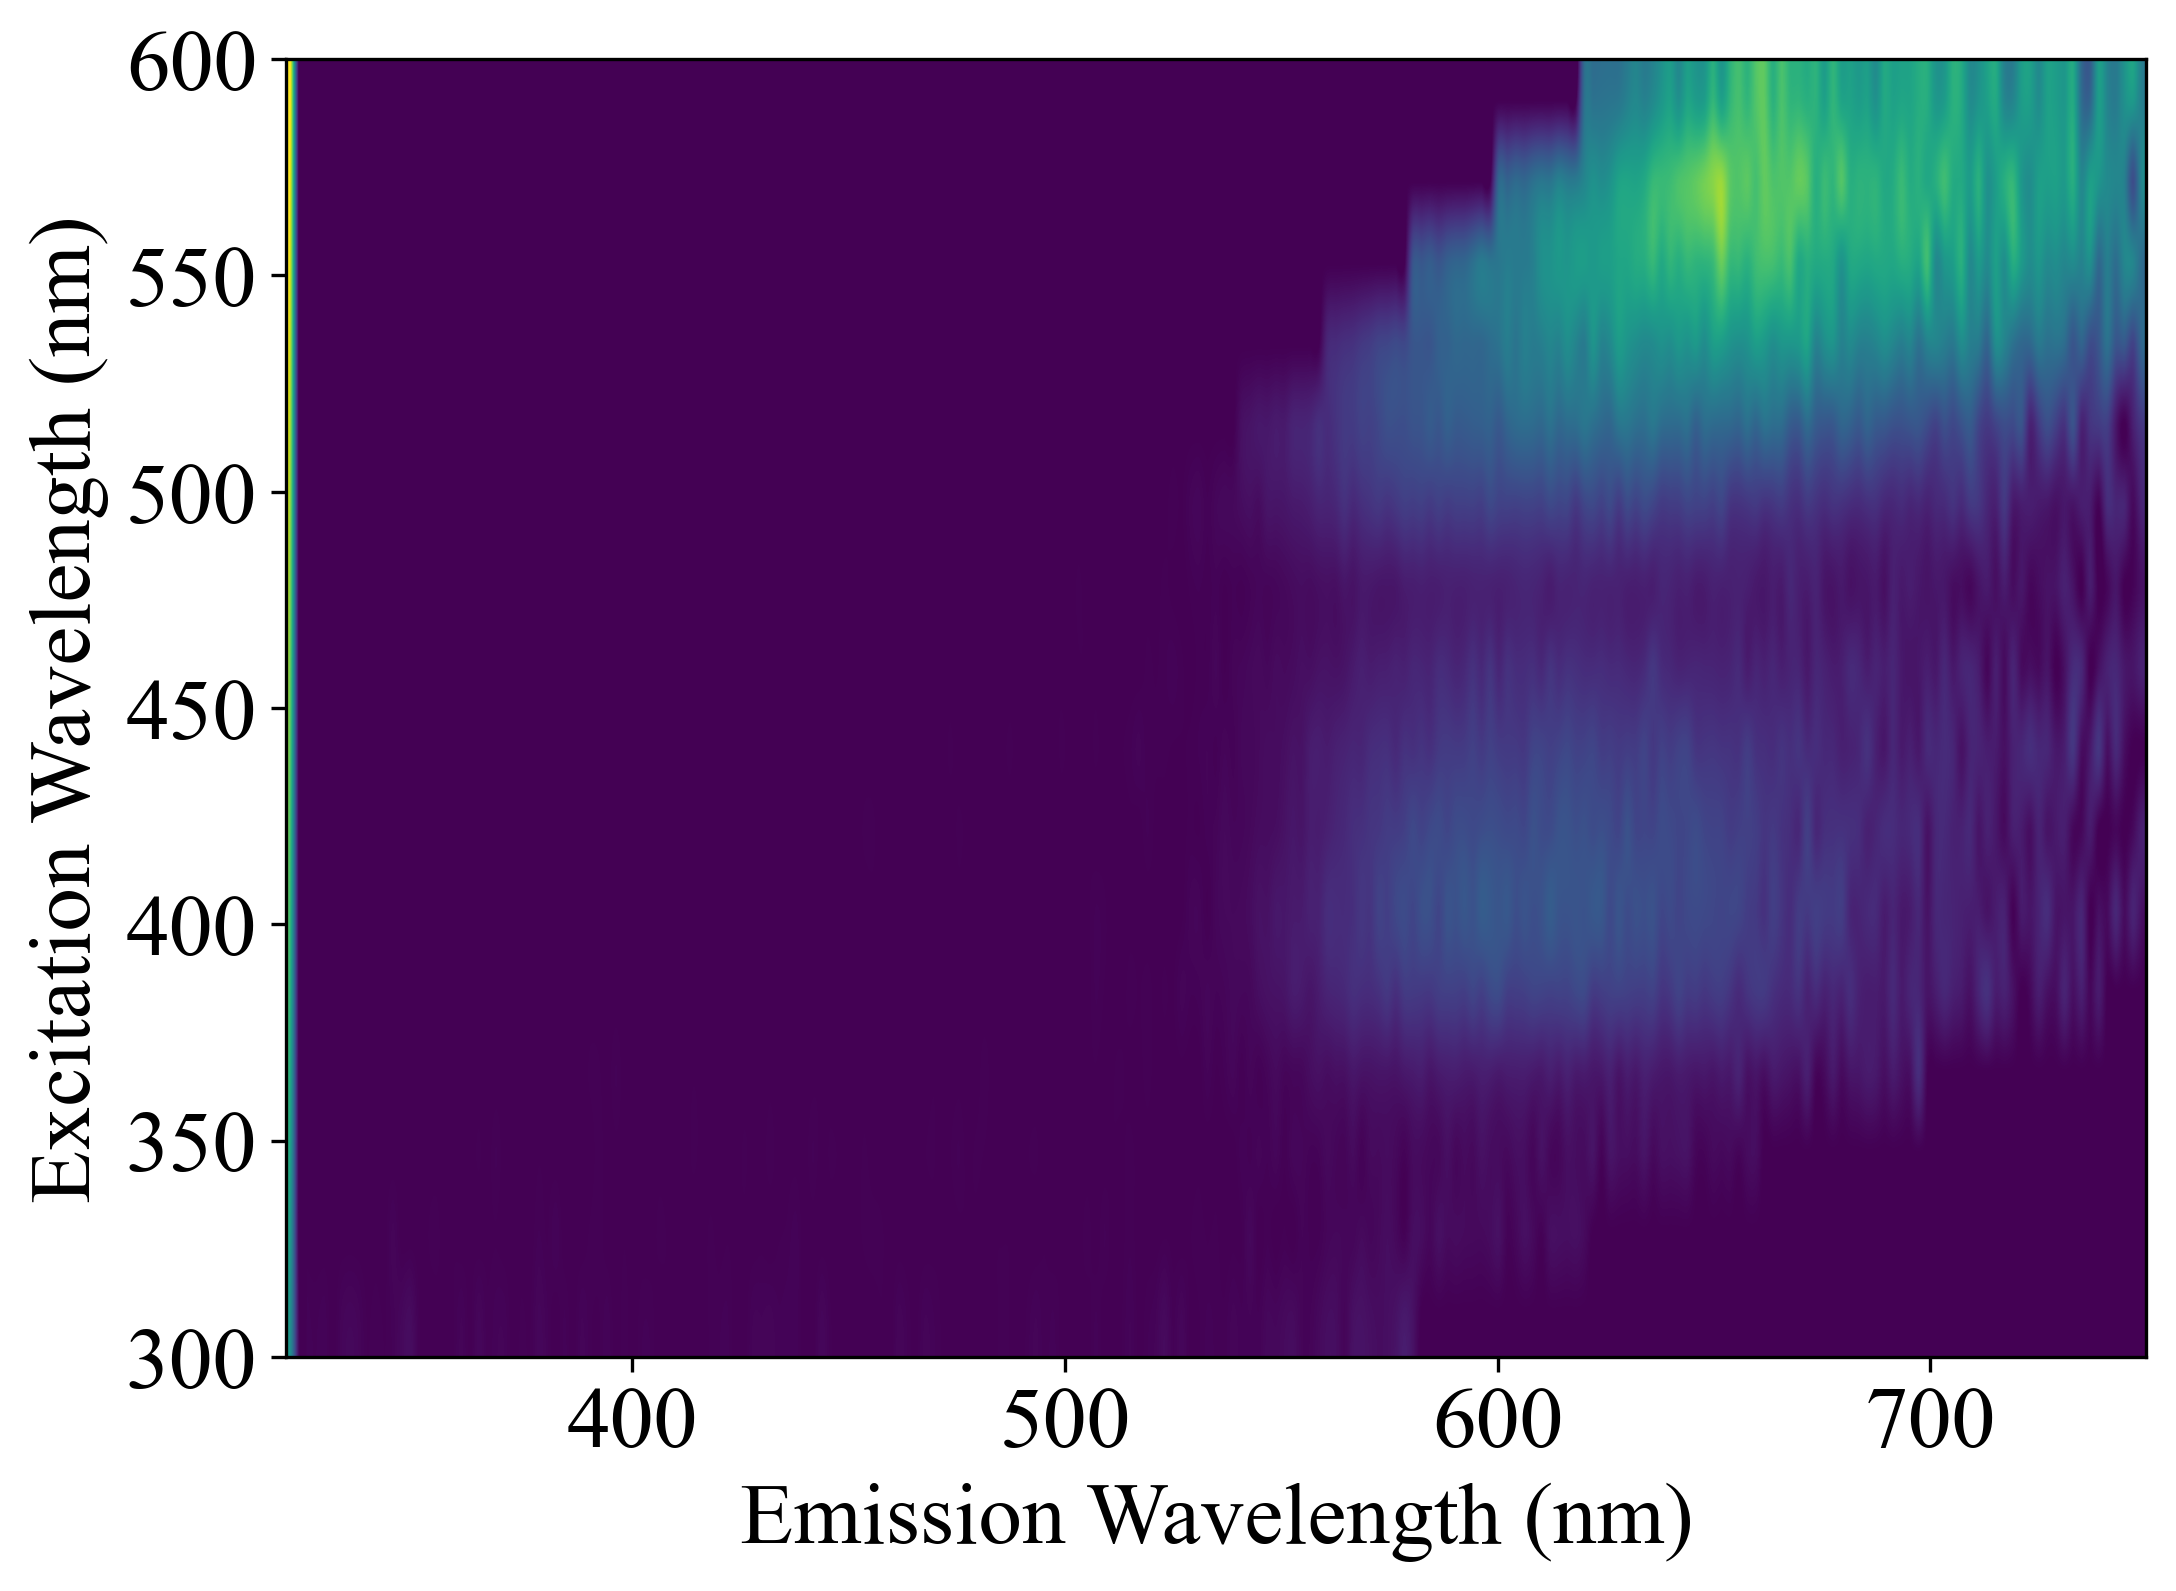

In [106]:
figu=beverages.loc[15,'300_PLspec']
plt.figure(figsize=(8,6),dpi=300)
plt.imshow(figu,extent=[320,750,300,600],origin="lower",interpolation='spline16')	
plt.xlabel("Emission Wavelength (nm)")
plt.ylabel("Excitation Wavelength (nm)")
plt.savefig('csv/png/chimay_300PLspec_2.png',bbox_inches = "tight",facecolor='w')